In [2]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import TrainingArguments, Trainer

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
df = pd.read_csv('Data_linguistique/Data_analyse.csv')

In [118]:
df.head()

,Eleve_ID,classe,genre,personnages,texte,texte_extrait,texte_nettoye,nb_mots,texte_nettoye_stop_words,texte_lemmatise,nb_mots_uniques,TTR,top_20_mots
0,ID_0001,1,0,21,Textes/0001.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est trop tard…\nIls ont chacun espoir de se...,240,trop tard… chacun espoir rapprocher benjamin p...,trop tard chacun espoir rapprocher benjamin pl...,98,0.408333,"['benjamin', 'plus', 'anaïs', 'loterie', 'bate..."
1,ID_0002,1,0,11,Textes/0002.docx,Deux enfants s’amusent à la mer sur un petit b...,"Il est déjà trop tard, Pierre et Maxime sont a...",181,déjà trop tard pierre maxime large mère dormai...,déjà trop tard pierre maxim large mèr dormir p...,86,0.475138,"['deux', 'alors', 'bateau', 'île', 'maxim', 'f..."
2,ID_0003,1,0,11,Textes/0003.docx,Deux enfants s’amusent à la mer sur un petit b...,Il est déjà trop tard pour se rapprocher du ri...,360,déjà trop tard rapprocher rivage alors deux en...,déjà trop tard rapprocher rivage alors deux en...,128,0.355556,"['enfant', 'deux', 'pouvoir', 'animal', 'alors..."
3,ID_0004,1,0,0,Textes/0004.docx,Deux enfants s’amusent à la mer sur un petit b...,Ils est déjà trop tard le bateau est trop loin...,152,déjà trop tard bateau trop loin rivage deux en...,déjà trop tard bateau trop loin rivage deux en...,65,0.427632,"['enfant', 'île', 'être', 'mystérieux', 'pirat..."
4,ID_0005,1,0,11,Textes/0005.docx,Deux enfants s’amusent à la mer sur un petit b...,Deux enfants s’amusent à la mer sur un petit b...,212,deux enfants s’amusent mer petit bateau explor...,deux enfant amusent mer petit bateau explorate...,91,0.429245,"['michel', 'jean', 'kevin', 'deux', 'donc', 'e..."


Taille du train : 45, test : 20
Calcul des embeddings CamemBERT...
Shape embeddings train : (45, 768)

===== MLPClassifier =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



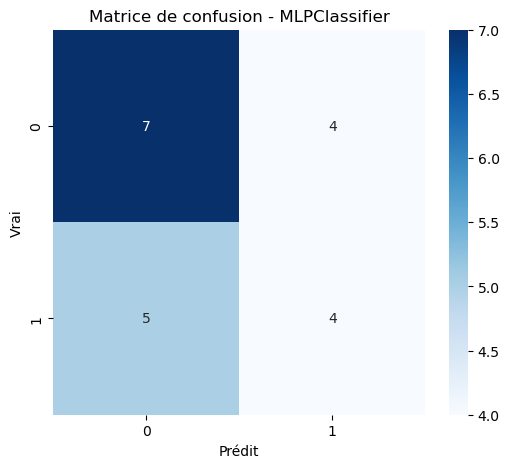


===== RandomForest =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20



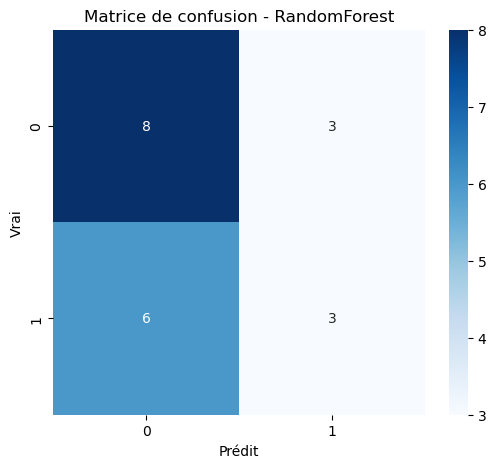


===== LogisticRegression =====
Accuracy : 0.6500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



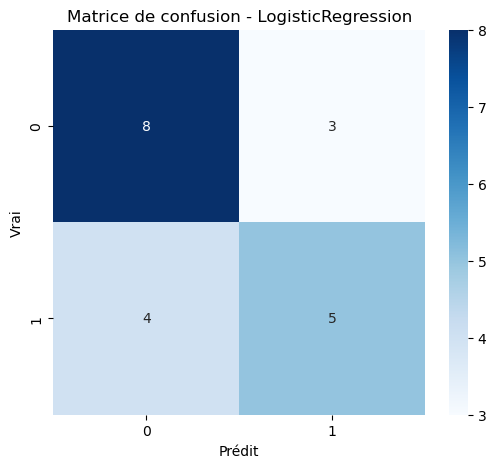


===== XGBoost =====
Accuracy : 0.4500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.38      0.33      0.35         9

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.44      0.45      0.45        20



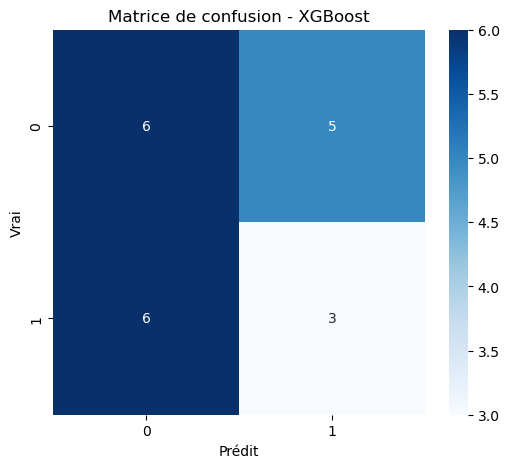


===== LightGBM =====
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12632
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


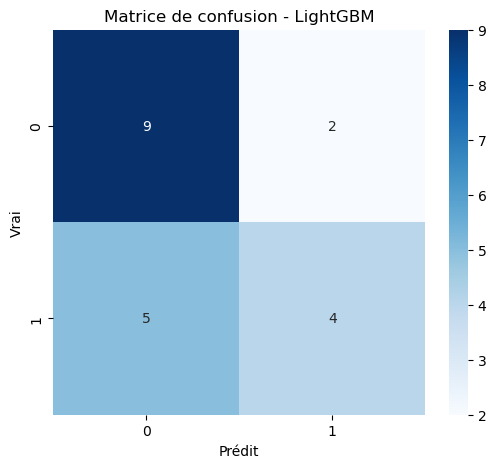


Résumé des performances :
               Modèle  Accuracy
2  LogisticRegression      0.65
4            LightGBM      0.65
0       MLPClassifier      0.55
1        RandomForest      0.55
3             XGBoost      0.45


In [ ]:
## Predictions finales avec CamemBERT (texte_lemmatise)

# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
import torch
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs à tester
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA



# =========================
# 3. Split Train/Test
# =========================
X_text = df['texte_lemmatise'].values
y = df['genre'].values  # Target binaire ou multi-class

train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.3, random_state=42, stratify=y)

X_train_text = X_text[train_idx]
X_test_text = X_text[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Taille du train : {len(train_idx)}, test : {len(test_idx)}")

# =========================
# 4. Embeddings CamemBERT
# =========================
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert_model = CamembertModel.from_pretrained("camembert-base")

def get_text_embeddings(texts, tokenizer, model):
    """Retourne le vecteur CLS pour chaque texte"""
    encodings = tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**encodings)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token

print("Calcul des embeddings CamemBERT...")
X_train_camembert = get_text_embeddings(X_train_text, tokenizer, camembert_model)
X_test_camembert = get_text_embeddings(X_test_text, tokenizer, camembert_model)

print("Shape embeddings train :", X_train_camembert.shape)



# =========================
# 7. Tester plusieurs modèles
# =========================
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu', max_iter=300, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,       # réduire le nombre d'arbres
        learning_rate=0.1,
        max_depth=4,            # arbres moins profonds
        n_jobs=2,               # limiter le parallélisme
        random_state=42,
        tree_method="hist"      # plus efficace en RAM
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )
    
}

results = []

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_camembert, y_train)
    y_pred = model.predict(X_test_camembert)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Sauvegarder les résultats
    results.append({"Modèle": name, "Accuracy": acc})

# =========================
# 8. Comparaison des résultats
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

Taille du train : 45, test : 20
Calcul des embeddings CamemBERT...
Shape embeddings train : (45, 768)

===== MLPClassifier =====
Accuracy : 0.6000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



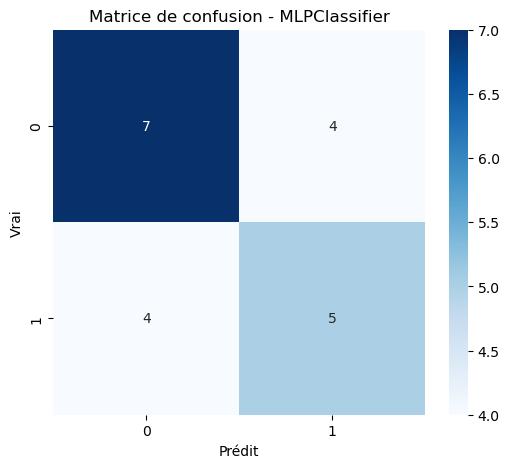


===== RandomForest =====
Accuracy : 0.6500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



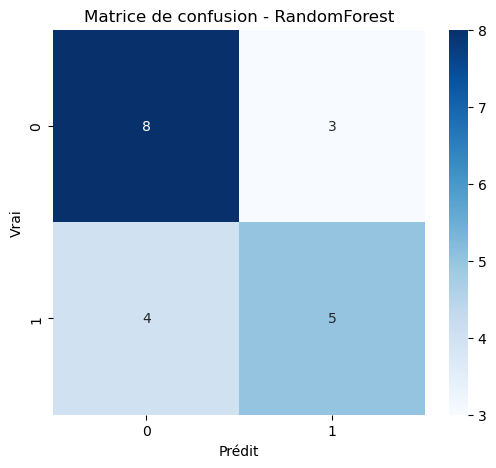


===== LogisticRegression =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20



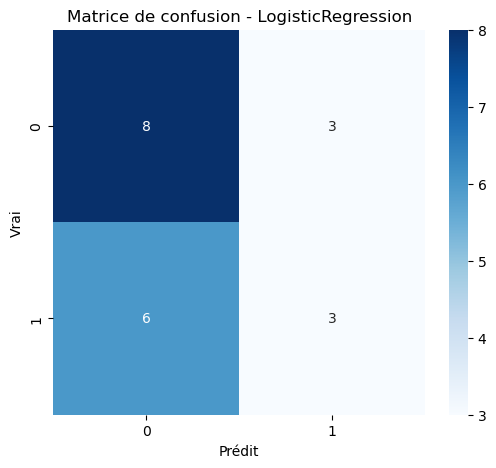


===== XGBoost =====
Accuracy : 0.6000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



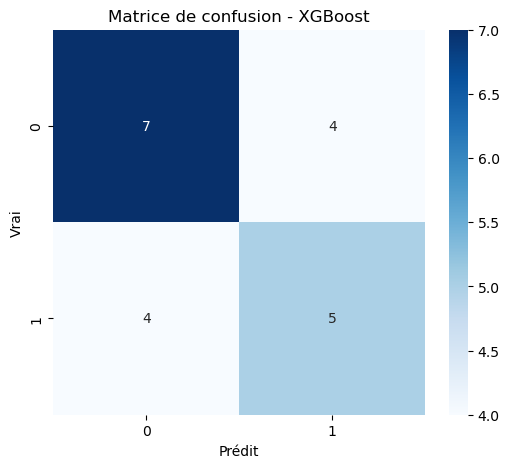


===== LightGBM =====
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12583
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


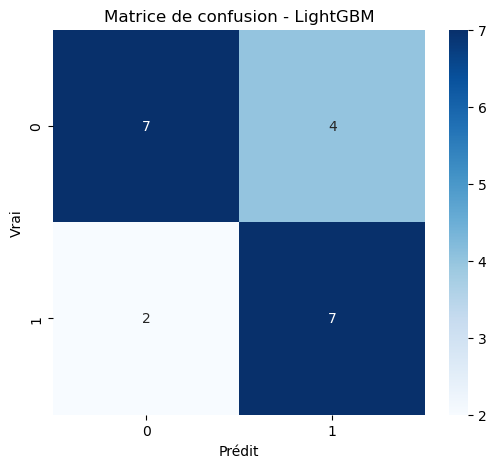


Résumé des performances :
               Modèle  Accuracy
4            LightGBM      0.70
1        RandomForest      0.65
0       MLPClassifier      0.60
3             XGBoost      0.60
2  LogisticRegression      0.55


In [9]:
## Predictions finales avec uniquement CamemBERT (texte nettoyé)

# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
import torch
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs à tester
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA



# =========================
# 3. Split Train/Test
# =========================
X_text = df['texte_nettoye'].values
y = df['genre'].values  # Target binaire ou multi-class

train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.3, random_state=42, stratify=y)

X_train_text = X_text[train_idx]
X_test_text = X_text[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Taille du train : {len(train_idx)}, test : {len(test_idx)}")

# =========================
# 4. Embeddings CamemBERT
# =========================
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert_model = CamembertModel.from_pretrained("camembert-base")

def get_text_embeddings(texts, tokenizer, model):
    """Retourne le vecteur CLS pour chaque texte"""
    encodings = tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**encodings)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token

print("Calcul des embeddings CamemBERT...")
X_train_camembert = get_text_embeddings(X_train_text, tokenizer, camembert_model)
X_test_camembert = get_text_embeddings(X_test_text, tokenizer, camembert_model)

print("Shape embeddings train :", X_train_camembert.shape)



# =========================
# 7. Tester plusieurs modèles
# =========================
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu', max_iter=300, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,       # réduire le nombre d'arbres
        learning_rate=0.1,
        max_depth=4,            # arbres moins profonds
        n_jobs=2,               # limiter le parallélisme
        random_state=42,
        tree_method="hist"      # plus efficace en RAM
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )
    
}

results = []

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_camembert, y_train)
    y_pred = model.predict(X_test_camembert)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Sauvegarder les résultats
    results.append({"Modèle": name, "Accuracy": acc})

# =========================
# 8. Comparaison des résultats
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

Taille du train : 45, test : 20
Calcul des embeddings CamemBERT...
Shape embeddings train : (45, 768)

===== MLPClassifier =====
Accuracy : 0.7000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



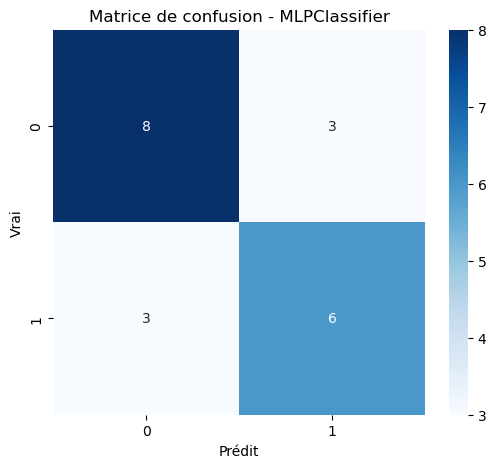


===== RandomForest =====
Accuracy : 0.6500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



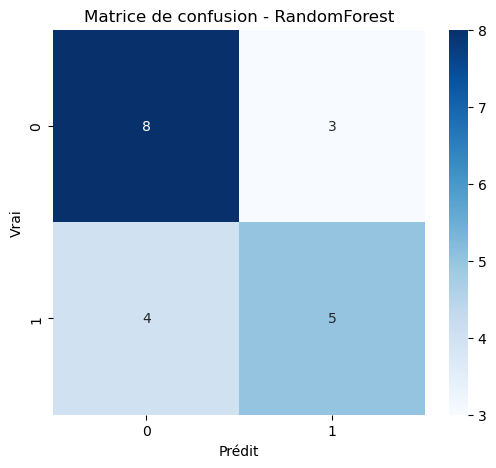


===== LogisticRegression =====
Accuracy : 0.6500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



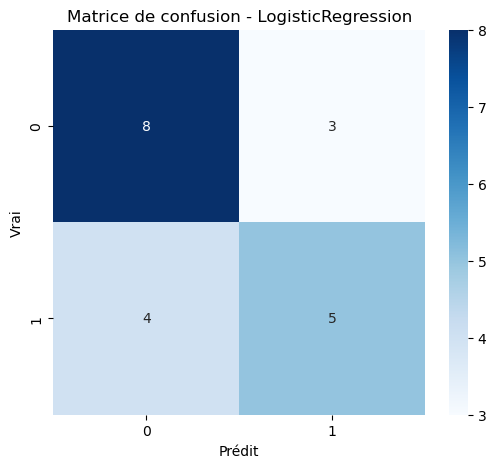


===== XGBoost =====
Accuracy : 0.6000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



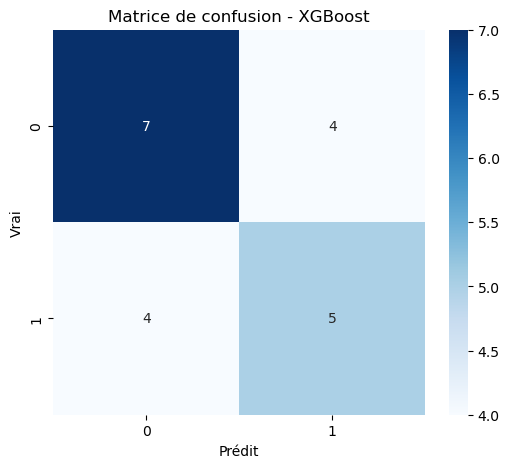


===== LightGBM =====
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12627
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


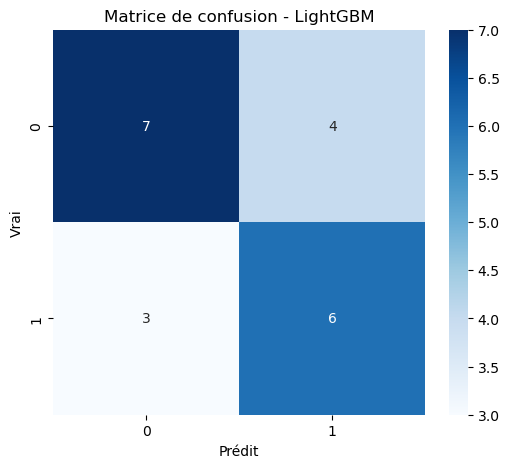


Résumé des performances :
               Modèle  Accuracy
0       MLPClassifier      0.70
1        RandomForest      0.65
2  LogisticRegression      0.65
4            LightGBM      0.65
3             XGBoost      0.60


In [ ]:
## Predictions finales avec uniquement CamemBERT (texte lemmatisé sans stopwords)

# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
import torch
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs à tester
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.decomposition import PCA



# =========================
# 3. Split Train/Test
# =========================
X_text = df['texte_sans_stopwords'].values
y = df['genre'].values  # Target binaire ou multi-class

train_idx, test_idx = train_test_split(np.arange(len(df)), test_size=0.3, random_state=42, stratify=y)

X_train_text = X_text[train_idx]
X_test_text = X_text[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Taille du train : {len(train_idx)}, test : {len(test_idx)}")

# =========================
# 4. Embeddings CamemBERT
# =========================
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")
camembert_model = CamembertModel.from_pretrained("camembert-base")

def get_text_embeddings(texts, tokenizer, model):
    """Retourne le vecteur CLS pour chaque texte"""
    encodings = tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    with torch.no_grad():
        outputs = model(**encodings)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token

print("Calcul des embeddings CamemBERT...")
X_train_camembert = get_text_embeddings(X_train_text, tokenizer, camembert_model)
X_test_camembert = get_text_embeddings(X_test_text, tokenizer, camembert_model)

print("Shape embeddings train :", X_train_camembert.shape)



# =========================
# 7. Tester plusieurs modèles
# =========================
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu', max_iter=300, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,       # réduire le nombre d'arbres
        learning_rate=0.1,
        max_depth=4,            # arbres moins profonds
        n_jobs=2,               # limiter le parallélisme
        random_state=42,
        tree_method="hist"      # plus efficace en RAM
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )
    
}

results = []

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_camembert, y_train)
    y_pred = model.predict(X_test_camembert)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Sauvegarder les résultats
    results.append({"Modèle": name, "Accuracy": acc})

# =========================
# 8. Comparaison des résultats
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

Taille du train : 45, test : 20
Calcul des embeddings XLM-RoBERTa...
Shape embeddings train : (45, 768)
Shape embeddings test : (20, 768)

===== MLPClassifier =====
Accuracy : 0.5000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20



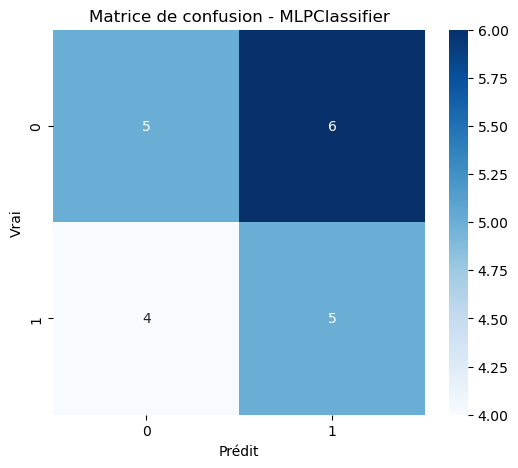


===== RandomForest =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



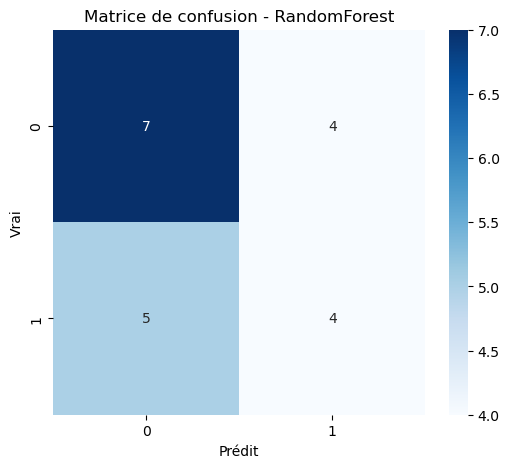


===== LogisticRegression =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

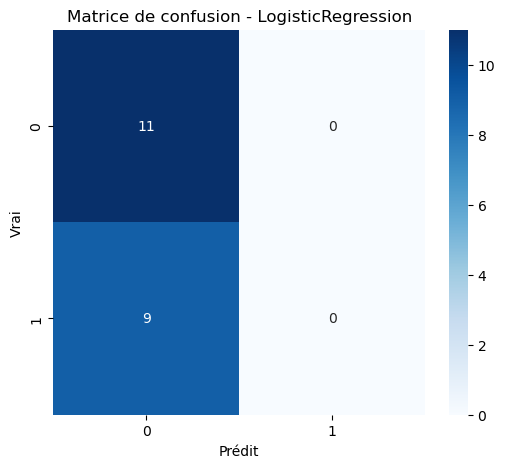


===== XGBoost =====
Accuracy : 0.4000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



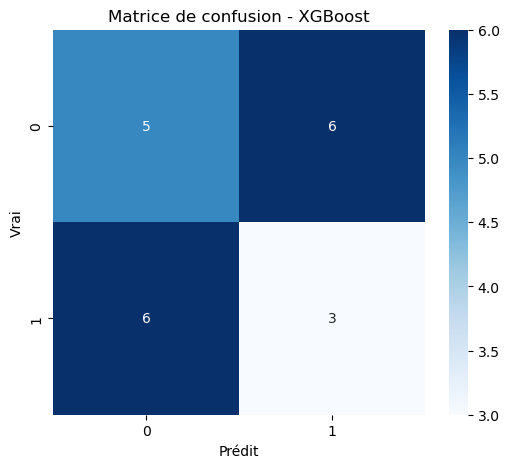


===== LightGBM =====
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12416
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


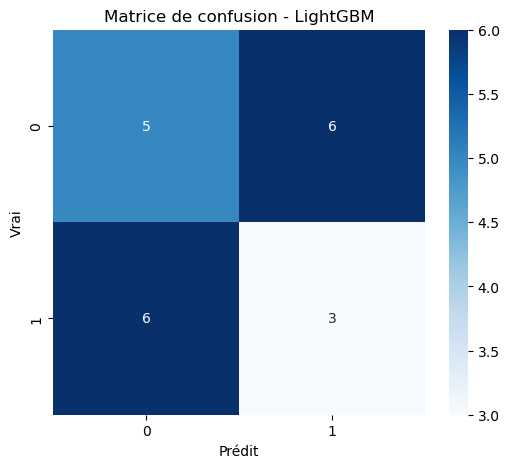


Résumé des performances :
               Modèle  Accuracy
1        RandomForest      0.55
2  LogisticRegression      0.55
0       MLPClassifier      0.50
3             XGBoost      0.40
4            LightGBM      0.40


In [ ]:
# predictions finales avec classification sur embeddings XLM-RoBERTa sur texte_lemmatise


# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# =========================
# 2. Split Train/Test
# =========================
X_text = df['texte_lemmatise'].values
y = df['genre'].values  # Target binaire ou multi-class

train_idx, test_idx = train_test_split(
    np.arange(len(df)),
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train_text = X_text[train_idx]
X_test_text = X_text[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Taille du train : {len(train_idx)}, test : {len(test_idx)}")

# =========================
# 3. Tokenizer et modèle XLM-RoBERTa
# =========================
model_name = "xlm-roberta-base"  # version multilingue standard
tokenizer = AutoTokenizer.from_pretrained(model_name)
xlmr_model = AutoModel.from_pretrained(model_name)

# =========================
# 4. Fonction d'extraction des embeddings
# =========================
def get_text_embeddings(texts, tokenizer, model, batch_size=8, max_length=256):
    """
    Retourne le vecteur CLS pour chaque texte avec batching
    """
    model.eval()  # mode évaluation
    all_embeddings = []

    # Découper en batchs pour éviter les crash mémoire
    for i in range(0, len(texts), batch_size):
        batch_texts = list(texts[i:i + batch_size])
        encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,  # raccourcir pour réduire la charge mémoire
            return_tensors="pt"
        )

        with torch.no_grad():
            outputs = model(**encodings)

        # Utiliser le vecteur CLS (position 0)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings)

# =========================
# 5. Calcul des embeddings
# =========================
print("Calcul des embeddings XLM-RoBERTa...")
X_train_embeddings = get_text_embeddings(X_train_text, tokenizer, xlmr_model)
X_test_embeddings = get_text_embeddings(X_test_text, tokenizer, xlmr_model)

print("Shape embeddings train :", X_train_embeddings.shape)
print("Shape embeddings test :", X_test_embeddings.shape)

# =========================
# 6. Définition des modèles à tester
# =========================
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu', max_iter=300, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,       # réduire le nombre d'arbres
        learning_rate=0.1,
        max_depth=4,            # arbres moins profonds
        n_jobs=2,               # limiter le parallélisme
        random_state=42,
        tree_method="hist"      # plus efficace en RAM
    ),   
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )
}

# =========================
# 7. Fonction pour la matrice de confusion
# =========================
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()

# =========================
# 8. Entraînement et évaluation
# =========================
results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_embeddings, y_train)
    y_pred = model.predict(X_test_embeddings)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Sauvegarder les résultats
    results.append({"Modèle": name, "Accuracy": acc})

# =========================
# 9. Comparaison des résultats
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

Taille du train : 45, test : 20
Calcul des embeddings XLM-RoBERTa...
Shape embeddings train : (45, 768)
Shape embeddings test : (20, 768)

===== MLPClassifier =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.50      0.56      0.53         9

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



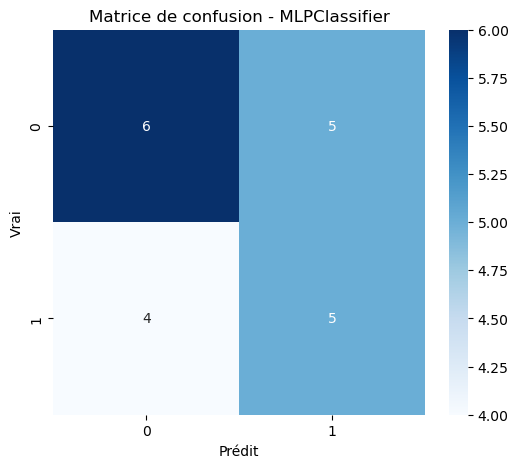


===== RandomForest =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



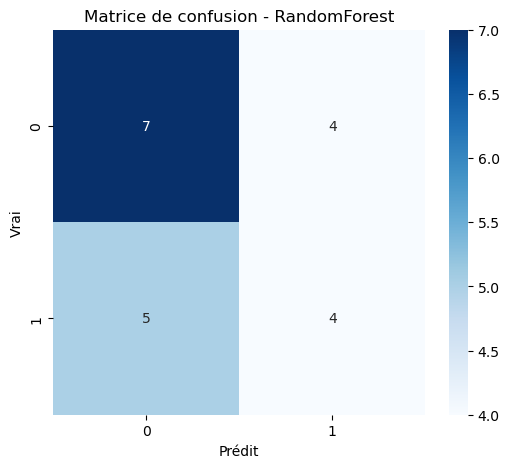


===== LogisticRegression =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20



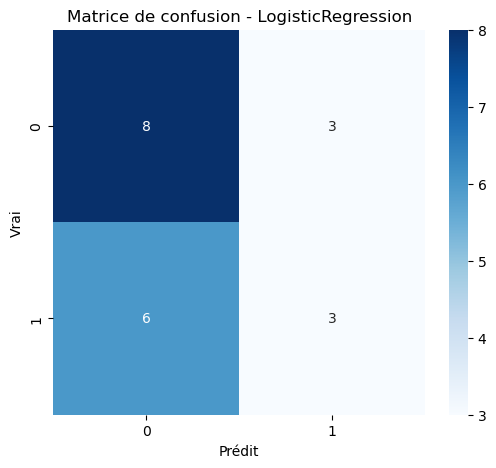


===== XGBoost =====
Accuracy : 0.4500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.40      0.44      0.42         9

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



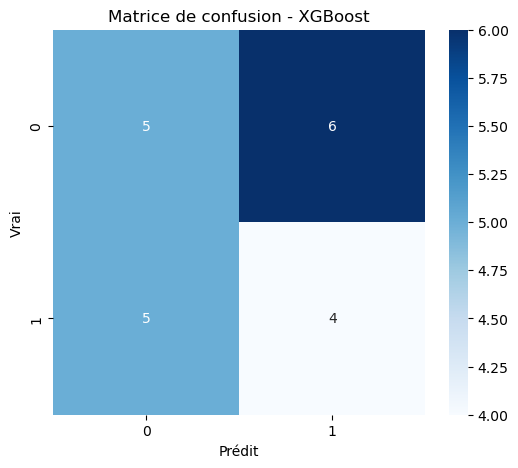


===== LightGBM =====
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12438
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


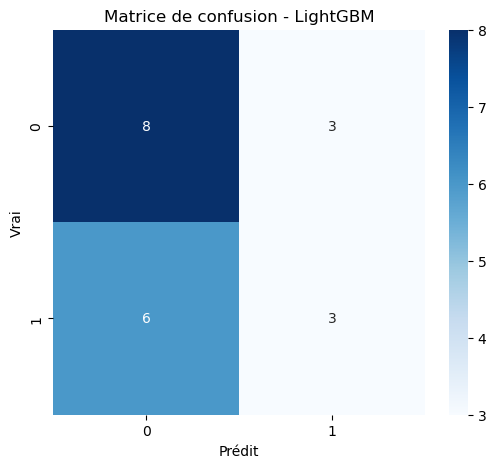


Résumé des performances :
               Modèle  Accuracy
0       MLPClassifier      0.55
1        RandomForest      0.55
2  LogisticRegression      0.55
4            LightGBM      0.55
3             XGBoost      0.45


In [12]:
# predictions finales avec classification sur embeddings XLM-RoBERTa (texte nettoyé)


# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# =========================
# 2. Split Train/Test
# =========================
X_text = df['texte_nettoye'].values
y = df['genre'].values  # Target binaire ou multi-class

train_idx, test_idx = train_test_split(
    np.arange(len(df)),
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train_text = X_text[train_idx]
X_test_text = X_text[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Taille du train : {len(train_idx)}, test : {len(test_idx)}")

# =========================
# 3. Tokenizer et modèle XLM-RoBERTa
# =========================
model_name = "xlm-roberta-base"  # version multilingue standard
tokenizer = AutoTokenizer.from_pretrained(model_name)
xlmr_model = AutoModel.from_pretrained(model_name)

# =========================
# 4. Fonction d'extraction des embeddings
# =========================
def get_text_embeddings(texts, tokenizer, model, batch_size=8, max_length=256):
    """
    Retourne le vecteur CLS pour chaque texte avec batching
    """
    model.eval()  # mode évaluation
    all_embeddings = []

    # Découper en batchs pour éviter les crash mémoire
    for i in range(0, len(texts), batch_size):
        batch_texts = list(texts[i:i + batch_size])
        encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,  # raccourcir pour réduire la charge mémoire
            return_tensors="pt"
        )

        with torch.no_grad():
            outputs = model(**encodings)

        # Utiliser le vecteur CLS (position 0)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings)

# =========================
# 5. Calcul des embeddings
# =========================
print("Calcul des embeddings XLM-RoBERTa...")
X_train_embeddings = get_text_embeddings(X_train_text, tokenizer, xlmr_model)
X_test_embeddings = get_text_embeddings(X_test_text, tokenizer, xlmr_model)

print("Shape embeddings train :", X_train_embeddings.shape)
print("Shape embeddings test :", X_test_embeddings.shape)

# =========================
# 6. Définition des modèles à tester
# =========================
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu', max_iter=300, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,       # réduire le nombre d'arbres
        learning_rate=0.1,
        max_depth=4,            # arbres moins profonds
        n_jobs=2,               # limiter le parallélisme
        random_state=42,
        tree_method="hist"      # plus efficace en RAM
    ),   
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )
}

# =========================
# 7. Fonction pour la matrice de confusion
# =========================
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()

# =========================
# 8. Entraînement et évaluation
# =========================
results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_embeddings, y_train)
    y_pred = model.predict(X_test_embeddings)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Sauvegarder les résultats
    results.append({"Modèle": name, "Accuracy": acc})

# =========================
# 9. Comparaison des résultats
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

Taille du train : 45, test : 20
Calcul des embeddings XLM-RoBERTa...
Shape embeddings train : (45, 768)
Shape embeddings test : (20, 768)

===== MLPClassifier =====
Accuracy : 0.5000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20



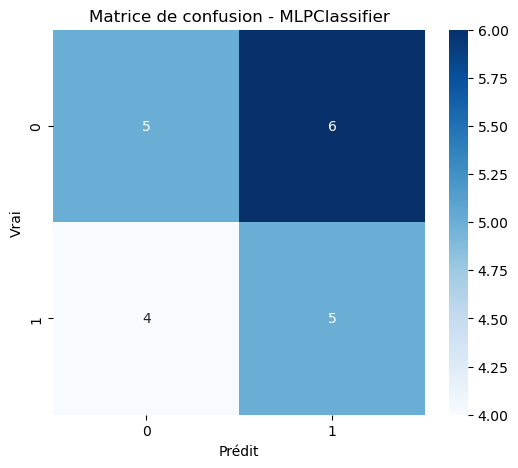


===== RandomForest =====
Accuracy : 0.6500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.60      0.67      0.63         9

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



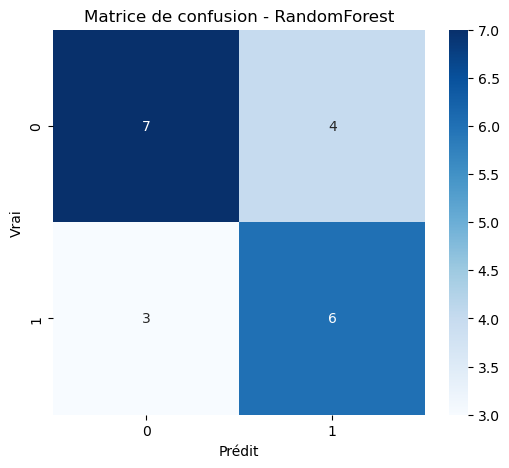


===== LogisticRegression =====
Accuracy : 0.5500
Rapport de classification :
               precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

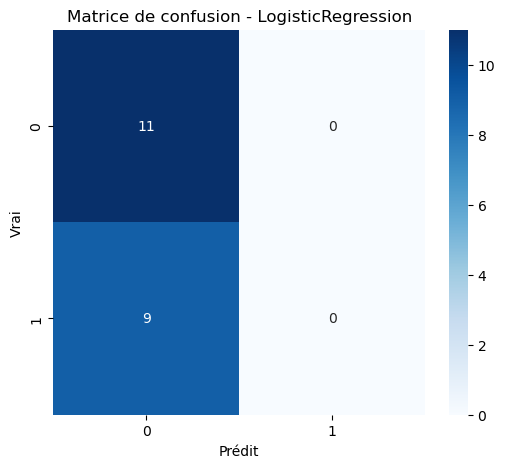


===== XGBoost =====
Accuracy : 0.6000
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.55      0.67      0.60         9

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



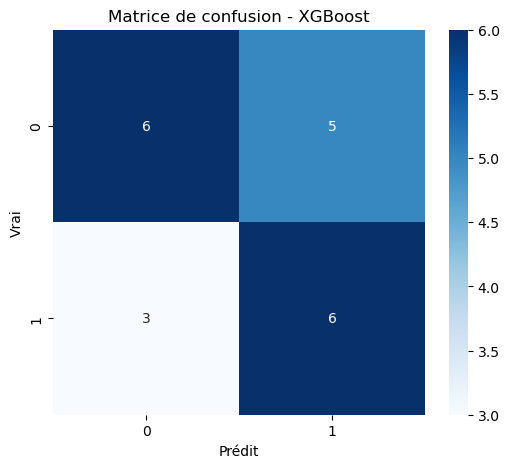


===== LightGBM =====
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12436
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


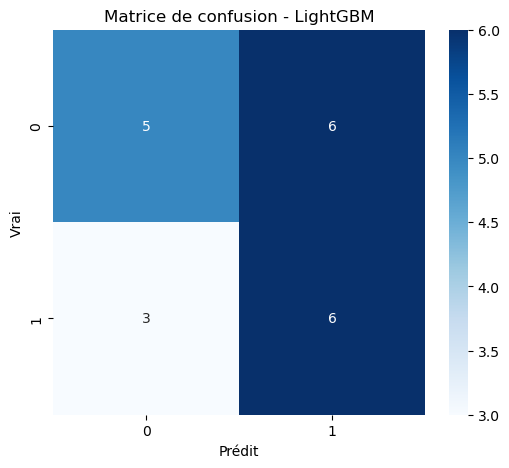


Résumé des performances :
               Modèle  Accuracy
1        RandomForest      0.65
3             XGBoost      0.60
2  LogisticRegression      0.55
4            LightGBM      0.55
0       MLPClassifier      0.50


In [13]:
# predictions finales avec classification sur embeddings XLM-RoBERTa (texte nettoyé sans stopwords)


# =========================
# 1. Imports
# =========================
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# =========================
# 2. Split Train/Test
# =========================
X_text = df['texte_sans_stopwords'].values
y = df['genre'].values  # Target binaire ou multi-class

train_idx, test_idx = train_test_split(
    np.arange(len(df)),
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_train_text = X_text[train_idx]
X_test_text = X_text[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

print(f"Taille du train : {len(train_idx)}, test : {len(test_idx)}")

# =========================
# 3. Tokenizer et modèle XLM-RoBERTa
# =========================
model_name = "xlm-roberta-base"  # version multilingue standard
tokenizer = AutoTokenizer.from_pretrained(model_name)
xlmr_model = AutoModel.from_pretrained(model_name)

# =========================
# 4. Fonction d'extraction des embeddings
# =========================
def get_text_embeddings(texts, tokenizer, model, batch_size=8, max_length=256):
    """
    Retourne le vecteur CLS pour chaque texte avec batching
    """
    model.eval()  # mode évaluation
    all_embeddings = []

    # Découper en batchs pour éviter les crash mémoire
    for i in range(0, len(texts), batch_size):
        batch_texts = list(texts[i:i + batch_size])
        encodings = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,  # raccourcir pour réduire la charge mémoire
            return_tensors="pt"
        )

        with torch.no_grad():
            outputs = model(**encodings)

        # Utiliser le vecteur CLS (position 0)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        all_embeddings.append(batch_embeddings)

    return np.vstack(all_embeddings)

# =========================
# 5. Calcul des embeddings
# =========================
print("Calcul des embeddings XLM-RoBERTa...")
X_train_embeddings = get_text_embeddings(X_train_text, tokenizer, xlmr_model)
X_test_embeddings = get_text_embeddings(X_test_text, tokenizer, xlmr_model)

print("Shape embeddings train :", X_train_embeddings.shape)
print("Shape embeddings test :", X_test_embeddings.shape)

# =========================
# 6. Définition des modèles à tester
# =========================
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu', max_iter=300, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=100,       # réduire le nombre d'arbres
        learning_rate=0.1,
        max_depth=4,            # arbres moins profonds
        n_jobs=2,               # limiter le parallélisme
        random_state=42,
        tree_method="hist"      # plus efficace en RAM
    ),   
    "LightGBM": LGBMClassifier(
        n_estimators=100,
        learning_rate=0.05,
        num_leaves=31,
        random_state=42
    )
}

# =========================
# 7. Fonction pour la matrice de confusion
# =========================
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel('Vrai')
    plt.xlabel('Prédit')
    plt.show()

# =========================
# 8. Entraînement et évaluation
# =========================
results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_embeddings, y_train)
    y_pred = model.predict(X_test_embeddings)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f}")
    print("Rapport de classification :\n", classification_report(y_test, y_pred))

    # Matrice de confusion
    plot_confusion_matrix(y_test, y_pred, name)

    # Sauvegarder les résultats
    results.append({"Modèle": name, "Accuracy": acc})

# =========================
# 9. Comparaison des résultats
# =========================
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

N° de textes: 65
Taille train: 45  |  test: 20
Device pour l'encodage : cpu
Chargement de LaBSE (cela peut prendre un peu de temps)...


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the use

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]


Shape embeddings train: (45, 768)
Shape embeddings test : (20, 768)

=== Modèle: MLPClassifier ===
Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      0.67      0.71         9

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



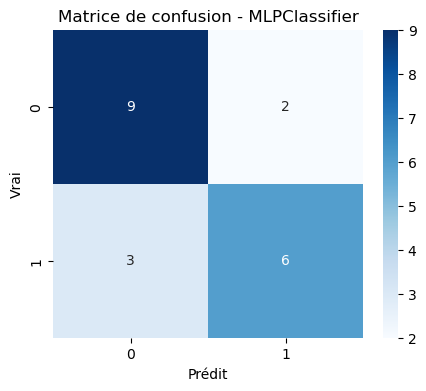


=== Modèle: RandomForest ===
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.56      0.71         9

    accuracy                           0.80        20
   macro avg       0.87      0.78      0.78        20
weighted avg       0.85      0.80      0.79        20



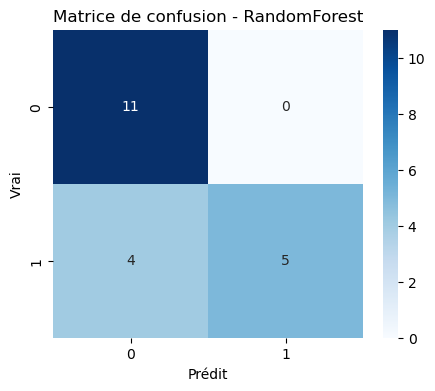


=== Modèle: LogisticRegression ===
Accuracy: 0.6500
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.57      0.89      0.70         9

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20



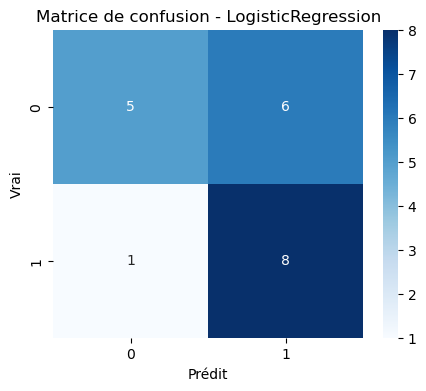


=== Modèle: XGBoost ===
Accuracy: 0.7000
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.64      0.78      0.70         9

    accuracy                           0.70        20
   macro avg       0.71      0.71      0.70        20
weighted avg       0.71      0.70      0.70        20



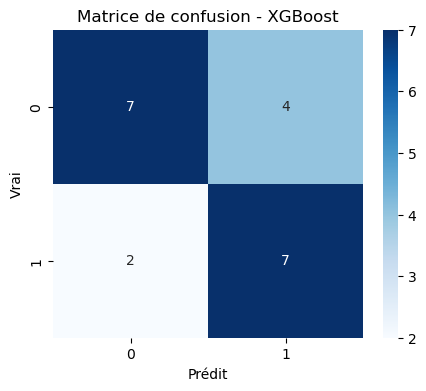


=== Modèle: LightGBM ===
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12792
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


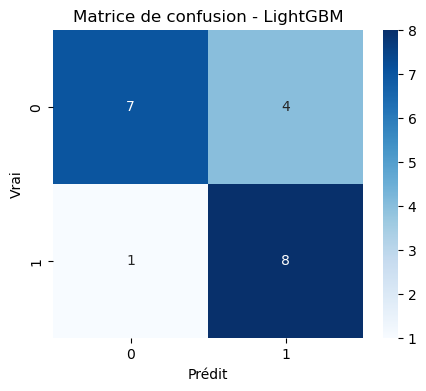


Résumé des performances :
               Modèle  Accuracy
1        RandomForest      0.80
0       MLPClassifier      0.75
4            LightGBM      0.75
3             XGBoost      0.70
2  LogisticRegression      0.65


In [14]:
# =========================
# Pipeline : embeddings LaBSE (text_lemmatise) -> modèles -> matrice de confusion
# =========================
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None
from lightgbm import LGBMClassifier

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16   # batch pour l'encodage LaBSE (ajuste si mémoire)
LA_BSE_MODEL = "sentence-transformers/LaBSE"  # modèle LaBSE
APPLY_SCALER = True     # Standardiser embeddings avant modèles comme MLP/LogReg
PLOT_CONF_MATRIX = True

# -------------------------
# 0. Préconditions : df doit exister
# df contient 'texte_lemmatise' et 'genre'
# -------------------------
print("N° de textes:", len(df))
assert 'texte_lemmatise' in df.columns and 'genre' in df.columns, "Le DataFrame doit contenir 'texte_lemmatise' et 'genre'"

# -------------------------
# 1. Split train / test
# -------------------------
X_text = df['texte_lemmatise'].astype(str).values
y = df['genre'].astype(int).values

train_idx, test_idx = train_test_split(np.arange(len(df)),
                                       test_size=TEST_SIZE,
                                       random_state=RANDOM_STATE,
                                       stratify=y)

X_train_text = X_text[train_idx]
X_test_text  = X_text[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]

print(f"Taille train: {len(X_train_text)}  |  test: {len(X_test_text)}")

# -------------------------
# 2. Charger LaBSE et extraire embeddings
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)
print("Chargement de LaBSE (cela peut prendre un peu de temps)...")
labse = SentenceTransformer(LA_BSE_MODEL, device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    # renvoie un np.ndarray shape (n_texts, dim_emb)
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)  # on standardise plus bas si besoin

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb  = encode_texts(X_test_text, labse)

print("Shape embeddings train:", X_train_emb.shape)
print("Shape embeddings test :", X_test_emb.shape)

# -------------------------
# 3. Option : standardiser embeddings (utile pour MLP/LogReg)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test  = scaler.transform(X_test_emb)
else:
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. Définitions des modèles à tester
# -------------------------
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu',
                                   max_iter=500, random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=2),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=RANDOM_STATE),
}

# Ajouter XGBoost seulement si dispo
if XGBClassifier is not None:
    models["XGBoost"] = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        n_jobs=2,
        random_state=RANDOM_STATE,
        tree_method="hist",
        verbosity=0
    )

# LightGBM
models["LightGBM"] = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=RANDOM_STATE)

# -------------------------
# 5. Entraînement / évaluation et matrice de confusion
# -------------------------
results = []
def plot_confusion_matrix(y_true, y_pred, model_name, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels if labels is not None else np.unique(y_true),
                yticklabels=labels if labels is not None else np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel("Vrai")
    plt.xlabel("Prédit")
    plt.show()

for name, clf in models.items():
    print(f"\n=== Modèle: {name} ===")
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Test désactivation de la matrice de confusion
        plot_confusion_matrix(y_test, y_pred, name, labels=np.unique(y))
        # Sauvegarder les résultats
        results.append({"Modèle": name, "Accuracy": acc})
    except Exception as e:
        print(f"Erreur avec le modèle {name} : {e}")

# -------------------------
# 6. Résumé
# -------------------------

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

N° de textes: 65
Taille train: 45  |  test: 20
Device pour l'encodage : cpu
Chargement de LaBSE (cela peut prendre un peu de temps)...


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


Shape embeddings train: (45, 768)
Shape embeddings test : (20, 768)

=== Modèle: MLPClassifier ===
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



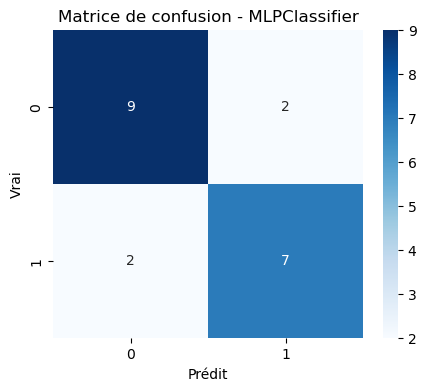


=== Modèle: RandomForest ===
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



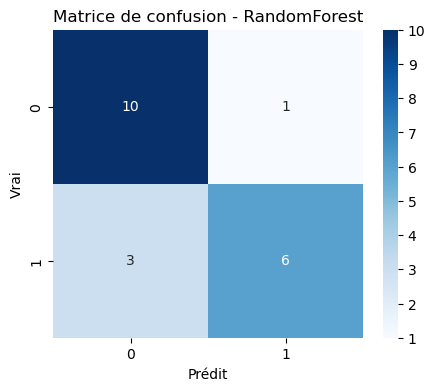


=== Modèle: LogisticRegression ===
Accuracy: 0.7000
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.64      0.78      0.70         9

    accuracy                           0.70        20
   macro avg       0.71      0.71      0.70        20
weighted avg       0.71      0.70      0.70        20



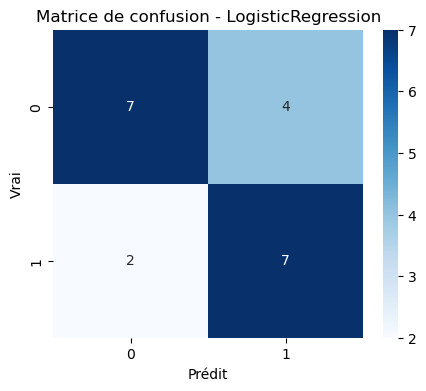


=== Modèle: XGBoost ===
Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.83      0.56      0.67         9

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20



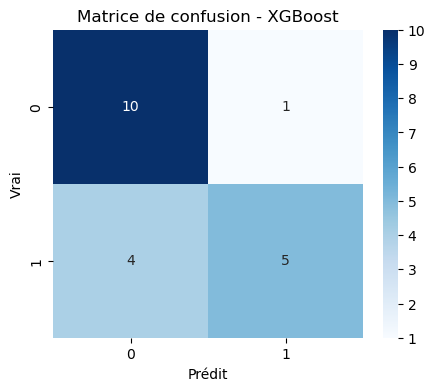


=== Modèle: LightGBM ===
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12818
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


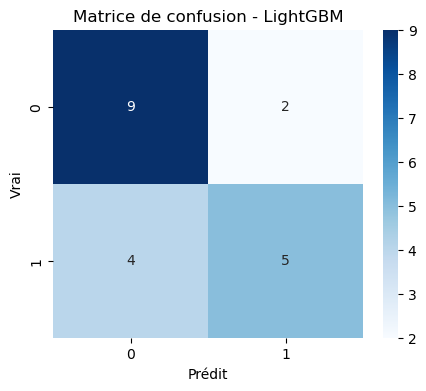


Résumé des performances :
               Modèle  Accuracy
0       MLPClassifier      0.80
1        RandomForest      0.80
3             XGBoost      0.75
2  LogisticRegression      0.70
4            LightGBM      0.70


In [15]:
# =========================
# Pipeline : embeddings LaBSE (sur texte nettoye) -> modèles -> matrice de confusion
# =========================
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None
from lightgbm import LGBMClassifier

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16   # batch pour l'encodage LaBSE (ajuste si mémoire)
LA_BSE_MODEL = "sentence-transformers/LaBSE"  # modèle LaBSE
APPLY_SCALER = True     # Standardiser embeddings avant modèles comme MLP/LogReg
PLOT_CONF_MATRIX = True

# -------------------------
# 0. Préconditions : df doit exister
# df contient 'texte_nettoye' et 'genre'
# -------------------------
print("N° de textes:", len(df))
assert 'texte_nettoye' in df.columns and 'genre' in df.columns, "Le DataFrame doit contenir 'texte_nettoye' et 'genre'"

# -------------------------
# 1. Split train / test
# -------------------------
X_text = df['texte_nettoye'].astype(str).values
y = df['genre'].astype(int).values

train_idx, test_idx = train_test_split(np.arange(len(df)),
                                       test_size=TEST_SIZE,
                                       random_state=RANDOM_STATE,
                                       stratify=y)

X_train_text = X_text[train_idx]
X_test_text  = X_text[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]

print(f"Taille train: {len(X_train_text)}  |  test: {len(X_test_text)}")

# -------------------------
# 2. Charger LaBSE et extraire embeddings
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)
print("Chargement de LaBSE (cela peut prendre un peu de temps)...")
labse = SentenceTransformer(LA_BSE_MODEL, device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    # renvoie un np.ndarray shape (n_texts, dim_emb)
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)  # on standardise plus bas si besoin

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb  = encode_texts(X_test_text, labse)

print("Shape embeddings train:", X_train_emb.shape)
print("Shape embeddings test :", X_test_emb.shape)

# -------------------------
# 3. Option : standardiser embeddings (utile pour MLP/LogReg)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test  = scaler.transform(X_test_emb)
else:
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. Définitions des modèles à tester
# -------------------------
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu',
                                   max_iter=500, random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=2),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=RANDOM_STATE),
}

# Ajouter XGBoost seulement si dispo
if XGBClassifier is not None:
    models["XGBoost"] = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        n_jobs=2,
        random_state=RANDOM_STATE,
        tree_method="hist",
        verbosity=0
    )

# LightGBM
models["LightGBM"] = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=RANDOM_STATE)

# -------------------------
# 5. Entraînement / évaluation et matrice de confusion
# -------------------------
results = []
def plot_confusion_matrix(y_true, y_pred, model_name, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels if labels is not None else np.unique(y_true),
                yticklabels=labels if labels is not None else np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel("Vrai")
    plt.xlabel("Prédit")
    plt.show()

for name, clf in models.items():
    print(f"\n=== Modèle: {name} ===")
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Test désactivation de la matrice de confusion
        plot_confusion_matrix(y_test, y_pred, name, labels=np.unique(y))
        # Sauvegarder les résultats
        results.append({"Modèle": name, "Accuracy": acc})
    except Exception as e:
        print(f"Erreur avec le modèle {name} : {e}")

# -------------------------
# 6. Résumé
# -------------------------

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

N° de textes: 65
Taille train: 45  |  test: 20
Device pour l'encodage : cpu
Chargement de LaBSE (cela peut prendre un peu de temps)...


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]


Shape embeddings train: (45, 768)
Shape embeddings test : (20, 768)

=== Modèle: MLPClassifier ===
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.86      0.67      0.75         9

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20



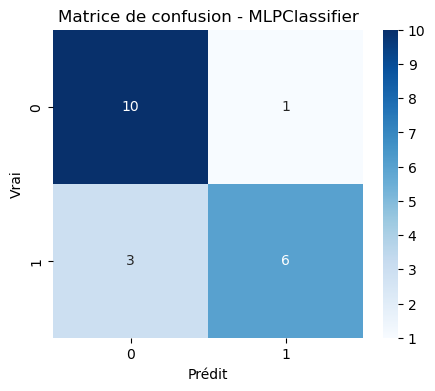


=== Modèle: RandomForest ===
Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.83      0.56      0.67         9

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20



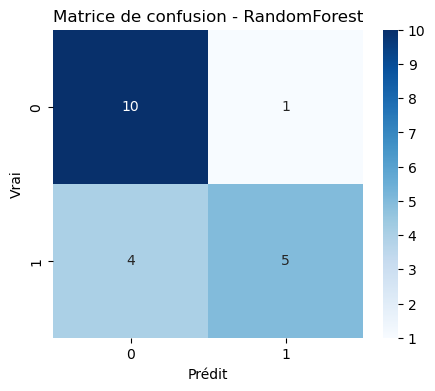


=== Modèle: LogisticRegression ===
Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20



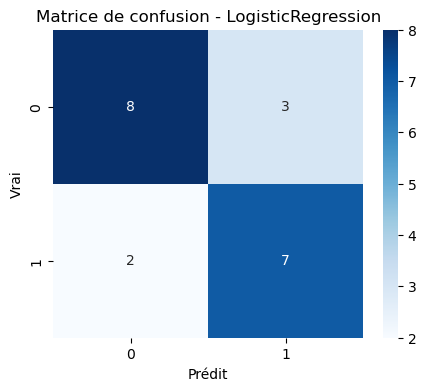


=== Modèle: XGBoost ===
Accuracy: 0.6500
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.58      0.78      0.67         9

    accuracy                           0.65        20
   macro avg       0.67      0.66      0.65        20
weighted avg       0.68      0.65      0.65        20



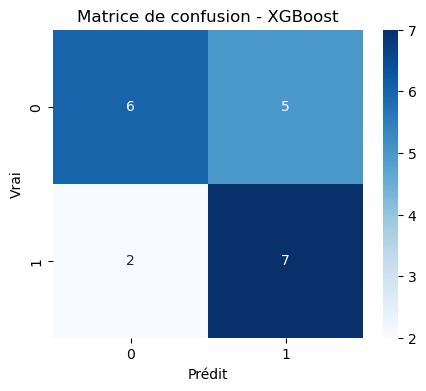


=== Modèle: LightGBM ===
[LightGBM] [Info] Number of positive: 21, number of negative: 24
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12800
[LightGBM] [Info] Number of data points in the train set: 45, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


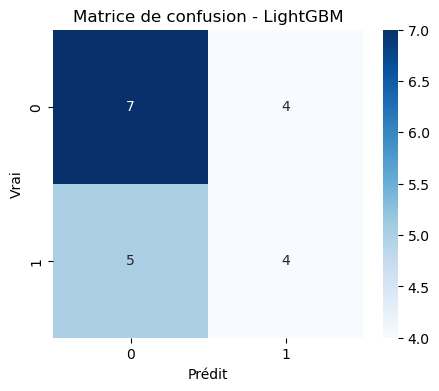


Résumé des performances :
               Modèle  Accuracy
0       MLPClassifier      0.80
1        RandomForest      0.75
2  LogisticRegression      0.75
3             XGBoost      0.65
4            LightGBM      0.55


In [16]:
# =========================
# Pipeline : embeddings LaBSE (sur texte nettoye sans stopwords) -> modèles -> matrice de confusion
# =========================
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifieurs
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None
from lightgbm import LGBMClassifier

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16   # batch pour l'encodage LaBSE (ajuste si mémoire)
LA_BSE_MODEL = "sentence-transformers/LaBSE"  # modèle LaBSE
APPLY_SCALER = True     # Standardiser embeddings avant modèles comme MLP/LogReg
PLOT_CONF_MATRIX = True

# -------------------------
# 0. Préconditions : df doit exister
# df contient 'texte_sans_stopwords' et 'genre'
# -------------------------
print("N° de textes:", len(df))
assert 'texte_sans_stopwords' in df.columns and 'genre' in df.columns, "Le DataFrame doit contenir 'texte_nettoye_stop_words' et 'genre'"

# -------------------------
# 1. Split train / test
# -------------------------
X_text = df['texte_sans_stopwords'].astype(str).values
y = df['genre'].astype(int).values

train_idx, test_idx = train_test_split(np.arange(len(df)),
                                       test_size=TEST_SIZE,
                                       random_state=RANDOM_STATE,
                                       stratify=y)

X_train_text = X_text[train_idx]
X_test_text  = X_text[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]

print(f"Taille train: {len(X_train_text)}  |  test: {len(X_test_text)}")

# -------------------------
# 2. Charger LaBSE et extraire embeddings
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)
print("Chargement de LaBSE (cela peut prendre un peu de temps)...")
labse = SentenceTransformer(LA_BSE_MODEL, device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    # renvoie un np.ndarray shape (n_texts, dim_emb)
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)  # on standardise plus bas si besoin

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb  = encode_texts(X_test_text, labse)

print("Shape embeddings train:", X_train_emb.shape)
print("Shape embeddings test :", X_test_emb.shape)

# -------------------------
# 3. Option : standardiser embeddings (utile pour MLP/LogReg)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test  = scaler.transform(X_test_emb)
else:
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. Définitions des modèles à tester
# -------------------------
models = {
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(256, 64), activation='relu',
                                   max_iter=500, random_state=RANDOM_STATE),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=2),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=RANDOM_STATE),
}

# Ajouter XGBoost seulement si dispo
if XGBClassifier is not None:
    models["XGBoost"] = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=4,
        n_jobs=2,
        random_state=RANDOM_STATE,
        tree_method="hist",
        verbosity=0
    )

# LightGBM
models["LightGBM"] = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=RANDOM_STATE)

# -------------------------
# 5. Entraînement / évaluation et matrice de confusion
# -------------------------
results = []
def plot_confusion_matrix(y_true, y_pred, model_name, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels if labels is not None else np.unique(y_true),
                yticklabels=labels if labels is not None else np.unique(y_true))
    plt.title(f"Matrice de confusion - {model_name}")
    plt.ylabel("Vrai")
    plt.xlabel("Prédit")
    plt.show()

for name, clf in models.items():
    print(f"\n=== Modèle: {name} ===")
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Test désactivation de la matrice de confusion
        plot_confusion_matrix(y_test, y_pred, name, labels=np.unique(y))
        # Sauvegarder les résultats
        results.append({"Modèle": name, "Accuracy": acc})
    except Exception as e:
        print(f"Erreur avec le modèle {name} : {e}")

# -------------------------
# 6. Résumé
# -------------------------

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nRésumé des performances :")
print(results_df)

Taille train: 45 | test: 20
Device pour l'encodage : cpu


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]



Lancement du GridSearchCV...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.00

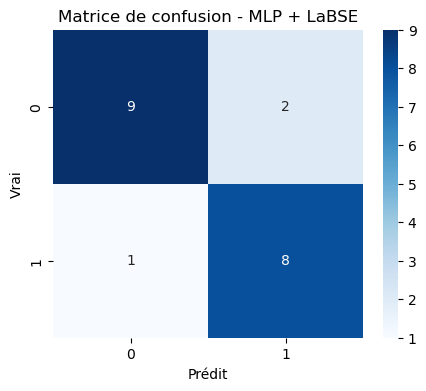

Nombre de textes mal classés : 3
Indices des textes mal classés dans le test set : [ 2  5 10]

Index global 45 - Eleve_ID : ID_0046 - Genre réel : 1, Prédiction : 0
Il est déjà tard…
Alors les deux enfant vont appeler leurs parents quand soudain les explorateurs voyent leurs bateau qui sont dans les mains d’un garçon. Ils vont le voir et leurs dit « rend nous nos ...

Index global 6 - Eleve_ID : ID_0007 - Genre réel : 0, Prédiction : 1
Il est déjà trop tard…
Sarah commençat à paniquer pendant que Paul son frère cherchait des solution. Mais, le vent se mit a souflé de plus en plus fort et les vague était de plus en plus haute. Panden ...

Index global 64 - Eleve_ID : ID_0065 - Genre réel : 0, Prédiction : 1
Il est déjà tard…
une famille va à la plage. les enfants mettent une banque à l’eau. il jouent au explorateur il secarte de la plage sans le savoir. le vent souffle très fort il vient de la terre. A u ...
Modèle et scaler sauvegardés !


In [ ]:
# LaBSE + MLPClassifier avec GridSearchCV et matrice de confusion sur texte_lemmatise

import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16  # batch pour encodage LaBSE
APPLY_SCALER = True

# -------------------------
# 1. Préparer les données
# -------------------------
assert 'texte_lemmatise' in df.columns and 'genre' in df.columns, \
    "Le DataFrame doit contenir 'texte_lemmatise' et 'genre'"

X_text = df['texte_lemmatise'].astype(str).values
y = df['genre'].astype(int).values

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Taille train: {len(X_train_text)} | test: {len(X_test_text)}")

# -------------------------
# 2. Encoder les textes avec LaBSE
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)

labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb = encode_texts(X_test_text, labse)

# -------------------------
# 3. Standardisation (important pour MLP)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test = scaler.transform(X_test_emb)
else:
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. GridSearchCV pour MLPClassifier
# -------------------------
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256, 64), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # régularisation L2
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

mlp = MLPClassifier(random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross validation
    verbose=2,
    n_jobs=-1
)

print("\nLancement du GridSearchCV...")
grid_search.fit(X_train, y_train)

# -------------------------
# 5. Résultats du GridSearch
# -------------------------
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print(f"Score CV (moyen) : {grid_search.best_score_:.4f}")

# -------------------------
# 6. Évaluation finale sur le test set
# -------------------------
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\n=== Évaluation sur le test set ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - MLP + LaBSE")
plt.show()

misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Nombre de textes mal classés : {len(misclassified_idx)}")
print("Indices des textes mal classés dans le test set :", misclassified_idx)

# Affichage des textes mal classés et de leur prédiction
for idx_in_test in misclassified_idx:
    idx_df = test_idx[idx_in_test]  # L'index dans le DataFrame d'origine
    genre_reel = y_test[idx_in_test]
    genre_pred = y_pred[idx_in_test]
    eleve_id = df.loc[idx_df, 'Eleve_ID'] if 'Eleve_ID' in df.columns else None
    extrait = df.loc[idx_df, 'texte_nettoye'][:200]

    print(f"\nIndex global {idx_df} - Eleve_ID : {eleve_id} - Genre réel : {genre_reel}, Prédiction : {genre_pred}")
    print(extrait, "...")

# Sauvegarde du meilleur modèle
joblib.dump(best_mlp, "best_mlp_model.pkl")

# Sauvegarde du scaler
joblib.dump(scaler, "scaler.pkl")

print("Modèle et scaler sauvegardés !")


Taille train: 45 | test: 20
Device pour l'encodage : cpu


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]



Lancement du GridSearchCV...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.00

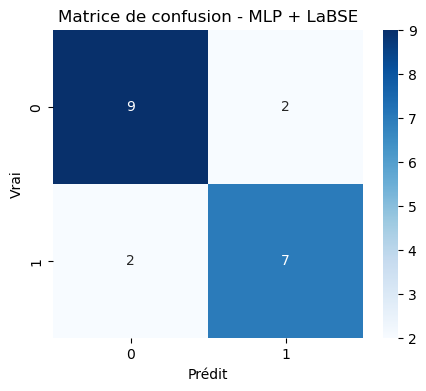

Nombre de textes mal classés : 4
Indices des textes mal classés dans le test set : [ 2  5  8 19]

Index global 45 - Eleve_ID : ID_0046 - Genre réel : 1, Prédiction : 0
Il est déjà tard…
Alors les deux enfant vont appeler leurs parents quand soudain les explorateurs voyent leurs bateau qui sont dans les mains d’un garçon. Ils vont le voir et leurs dit « rend nous nos ...

Index global 6 - Eleve_ID : ID_0007 - Genre réel : 0, Prédiction : 1
Il est déjà trop tard…
Sarah commençat à paniquer pendant que Paul son frère cherchait des solution. Mais, le vent se mit a souflé de plus en plus fort et les vague était de plus en plus haute. Panden ...

Index global 62 - Eleve_ID : ID_0063 - Genre réel : 1, Prédiction : 0
Il est déjà trop tard…
Les jumelles sont déjà trop loin, mais elles arrivent sur une toute petite t’île avec un palmier des coquiages et un dauphin ! Les jumelles se précipitent sur l’île est voit se  ...

Index global 54 - Eleve_ID : ID_0055 - Genre réel : 0, Prédiction : 1
Il es

In [33]:
# LaBSE sur texte_nettoye + MLPClassifier avec GridSearchCV et matrice de confusion

import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16  # batch pour encodage LaBSE
APPLY_SCALER = True

# -------------------------
# 1. Préparer les données
# -------------------------
assert 'texte_nettoye' in df.columns and 'genre' in df.columns, \
    "Le DataFrame doit contenir 'texte_nettoye' et 'genre'"

X_text = df['texte_nettoye'].astype(str).values
y = df['genre'].astype(int).values

X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Taille train: {len(X_train_text)} | test: {len(X_test_text)}")

# -------------------------
# 2. Encoder les textes avec LaBSE
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)

labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb = encode_texts(X_test_text, labse)

# -------------------------
# 3. Standardisation (important pour MLP)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test = scaler.transform(X_test_emb)
else:
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. GridSearchCV pour MLPClassifier
# -------------------------
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256, 64), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # régularisation L2
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

mlp = MLPClassifier(random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross validation
    verbose=2,
    n_jobs=-1
)

print("\nLancement du GridSearchCV...")
grid_search.fit(X_train, y_train)

# -------------------------
# 5. Résultats du GridSearch
# -------------------------
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print(f"Score CV (moyen) : {grid_search.best_score_:.4f}")

# -------------------------
# 6. Évaluation finale sur le test set
# -------------------------
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\n=== Évaluation sur le test set ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - MLP + LaBSE")
plt.show()

misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Nombre de textes mal classés : {len(misclassified_idx)}")
print("Indices des textes mal classés dans le test set :", misclassified_idx)

# Affichage des textes mal classés et de leur prédiction
for idx_in_test in misclassified_idx:
    idx_df = test_idx[idx_in_test]  # L'index dans le DataFrame d'origine
    genre_reel = y_test[idx_in_test]
    genre_pred = y_pred[idx_in_test]
    eleve_id = df.loc[idx_df, 'Eleve_ID'] if 'Eleve_ID' in df.columns else None
    extrait = df.loc[idx_df, 'texte_nettoye'][:200]

    print(f"\nIndex global {idx_df} - Eleve_ID : {eleve_id} - Genre réel : {genre_reel}, Prédiction : {genre_pred}")
    print(extrait, "...")

Taille train: 45 | test: 20
Device pour l'encodage : cpu


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]



Lancement du GridSearchCV...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=500; total time=   0.0s
[CV] END activation=relu, alpha=0.0

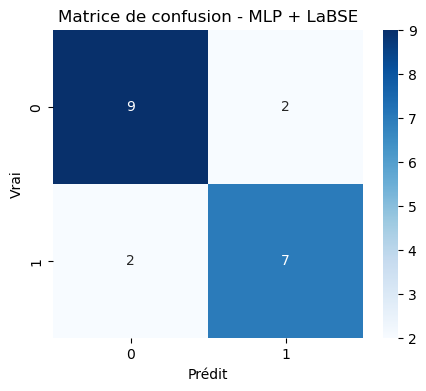

Nombre de textes mal classés : 4
Indices des textes mal classés dans le test set : [ 2  5  8 10]

Index global 45 - Eleve_ID : ID_0046 - Genre réel : 1, Prédiction : 0
Il est déjà tard…
Alors les deux enfant vont appeler leurs parents quand soudain les explorateurs voyent leurs bateau qui sont dans les mains d’un garçon. Ils vont le voir et leurs dit « rend nous nos ...

Index global 6 - Eleve_ID : ID_0007 - Genre réel : 0, Prédiction : 1
Il est déjà trop tard…
Sarah commençat à paniquer pendant que Paul son frère cherchait des solution. Mais, le vent se mit a souflé de plus en plus fort et les vague était de plus en plus haute. Panden ...

Index global 62 - Eleve_ID : ID_0063 - Genre réel : 1, Prédiction : 0
Il est déjà trop tard…
Les jumelles sont déjà trop loin, mais elles arrivent sur une toute petite t’île avec un palmier des coquiages et un dauphin ! Les jumelles se précipitent sur l’île est voit se  ...

Index global 64 - Eleve_ID : ID_0065 - Genre réel : 0, Prédiction : 1
Il es

In [23]:
# LaBSE sur texte nettoye sans stop words + MLPClassifier avec GridSearchCV et matrice de confusion

import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16  # batch pour encodage LaBSE
APPLY_SCALER = True

# -------------------------
# 1. Préparer les données
# -------------------------
assert 'texte_sans_stopwords' in df.columns and 'genre' in df.columns, \
    "Le DataFrame doit contenir 'texte_sans_stopwords' et 'genre'"

X_text = df['texte_sans_stopwords'].astype(str).values
y = df['genre'].astype(int).values

X_train_text, X_test_text, y_train, y_test, train_idx, test_idx = train_test_split(
    X_text, y, df.index,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Taille train: {len(X_train_text)} | test: {len(X_test_text)}")

# -------------------------
# 2. Encoder les textes avec LaBSE
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)

labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb = encode_texts(X_test_text, labse)

# -------------------------
# 3. Standardisation (important pour MLP)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test = scaler.transform(X_test_emb)
else:
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. GridSearchCV pour MLPClassifier
# -------------------------
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (256, 64), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # régularisation L2
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

mlp = MLPClassifier(random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross validation
    verbose=2,
    n_jobs=1
)

print("\nLancement du GridSearchCV...")
grid_search.fit(X_train, y_train)

# -------------------------
# 5. Résultats du GridSearch
# -------------------------
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print(f"Score CV (moyen) : {grid_search.best_score_:.4f}")

# -------------------------
# 6. Évaluation finale sur le test set
# -------------------------
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\n=== Évaluation sur le test set ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - MLP + LaBSE")
plt.show()


misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Nombre de textes mal classés : {len(misclassified_idx)}")
print("Indices des textes mal classés dans le test set :", misclassified_idx)

# Affichage des textes mal classés et de leur prédiction
for idx_in_test in misclassified_idx:
    idx_df = test_idx[idx_in_test]  # L'index dans le DataFrame d'origine
    genre_reel = y_test[idx_in_test]
    genre_pred = y_pred[idx_in_test]
    eleve_id = df.loc[idx_df, 'Eleve_ID'] if 'Eleve_ID' in df.columns else None
    extrait = df.loc[idx_df, 'texte_nettoye'][:200]

    print(f"\nIndex global {idx_df} - Eleve_ID : {eleve_id} - Genre réel : {genre_reel}, Prédiction : {genre_pred}")
    print(extrait, "...")



Taille train: 45 | test: 20
Device pour l'encodage : cpu


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:03<00:00,  1.02s/it]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]


Lancement du GridSearchCV (RandomForest)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_s

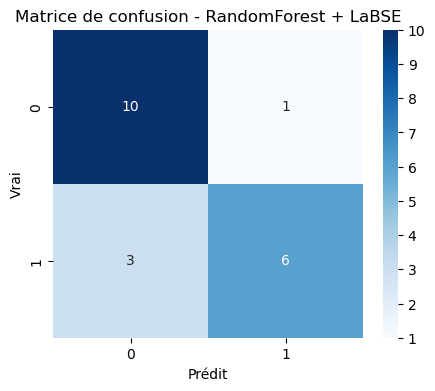


Top 10 dimensions d'embedding les plus importantes:
1. Dimension 493 - importance 0.01858
2. Dimension 273 - importance 0.01160
3. Dimension 338 - importance 0.01113
4. Dimension 296 - importance 0.01069
5. Dimension 285 - importance 0.01036
6. Dimension 560 - importance 0.00986
7. Dimension 565 - importance 0.00969
8. Dimension 196 - importance 0.00956
9. Dimension 645 - importance 0.00953
10. Dimension 155 - importance 0.00915


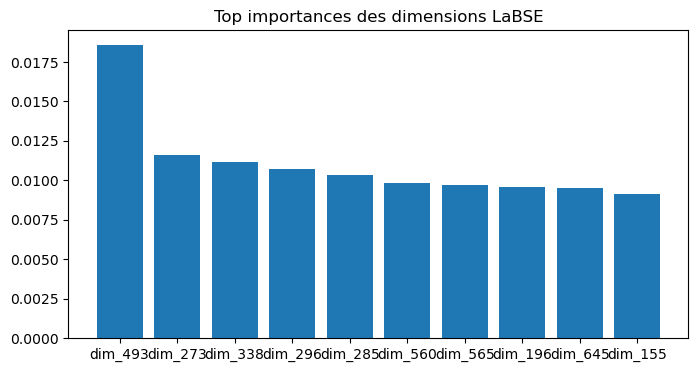


Nombre de textes mal classés dans le test set : 4
Indices globaux mal classés : [45  6 62 41]

Index global 45 - Eleve_ID: ID_0046
Vrai genre: 1  | Prédiction: 0
Extrait : Il est déjà tard…
Alors les deux enfant vont appeler leurs parents quand soudain les explorateurs voyent leurs bateau qui sont dans les mains d’un garçon. Ils vont le voir et leurs dit « rend nous nos bateau » mais le garçon dit « ce n’est pas a vous les copains disent au garçon « ci on jouer tous e ...


Index global 6 - Eleve_ID: ID_0007
Vrai genre: 0  | Prédiction: 1
Extrait : Il est déjà trop tard…
Sarah commençat à paniquer pendant que Paul son frère cherchait des solution. Mais, le vent se mit a souflé de plus en plus fort et les vague était de plus en plus haute. Pandent la nuit, le vent se calma et les deux enfant se mirent à dormir. Un voilier de croisière passé non ...


Index global 62 - Eleve_ID: ID_0063
Vrai genre: 1  | Prédiction: 0
Extrait : Il est déjà trop tard…
Les jumelles sont déjà trop loin, mai

In [34]:
# RandomForest sur LaBSE et GridSearchCV avec matrice de confusion sur texte_nettoye
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16         # batch pour encodage LaBSE
APPLY_SCALER = False          # RF n'a pas besoin d'être scale par défaut
GRID_N_JOBS = 2               # parallélisme pour GridSearch (mettre -1 si tu veux tous les coeurs)

# -------------------------
# 0. Vérifications / Préconditions
# -------------------------
assert 'texte_nettoye' in df.columns and 'genre' in df.columns, \
    "Le DataFrame doit contenir 'texte_nettoye' et 'genre'"

# Texte et labels
X_text_all = df['texte_nettoye'].astype(str).values
y_all = df['genre'].astype(int).values

# -------------------------
# 1. Split (sur les indices) pour garder trace des indices globaux
# -------------------------
all_idx = np.arange(len(df))
train_idx, test_idx = train_test_split(
    all_idx,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_all
)

X_train_text = X_text_all[train_idx]
X_test_text  = X_text_all[test_idx]
y_train = y_all[train_idx]
y_test  = y_all[test_idx]

print(f"Taille train: {len(X_train_text)} | test: {len(X_test_text)}")

# -------------------------
# 2. Encoder les textes avec LaBSE
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)

labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb = encode_texts(X_test_text, labse)

# -------------------------
# 3. Option : standardisation (utile si tu veux comparer avec MLP etc.)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test  = scaler.transform(X_test_emb)
else:
    scaler = None
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. GridSearchCV pour RandomForest
# -------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5]   # 'sqrt' ou fraction des features
}

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=GRID_N_JOBS
)

print("\nLancement du GridSearchCV (RandomForest)...")
grid_search.fit(X_train, y_train)

# -------------------------
# 5. Résultats du GridSearch
# -------------------------
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print(f"Score CV (moyen) : {grid_search.best_score_:.4f}")

# -------------------------
# 6. Évaluation finale sur le test set
# -------------------------
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Évaluation sur le test set ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_all), yticklabels=np.unique(y_all))
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - RandomForest + LaBSE")
plt.show()

# -------------------------
# 7. Importances de features (dimensions d'embedding)
# -------------------------
# Attention : les "features" ici sont les dimensions de l'embedding LaBSE (0..767)
importances = best_rf.feature_importances_
top_k = 10
top_idx = np.argsort(importances)[::-1][:top_k]
print(f"\nTop {top_k} dimensions d'embedding les plus importantes:")
for rank, i in enumerate(top_idx, 1):
    print(f"{rank}. Dimension {i} - importance {importances[i]:.5f}")

# Optionnel : plot importances
plt.figure(figsize=(8,4))
plt.bar([f"dim_{i}" for i in top_idx], importances[top_idx])
plt.title("Top importances des dimensions LaBSE")
plt.show()

# -------------------------
# 8. Textes mal classés dans le test set (indices globaux)
# -------------------------
misclassified_idx_in_test = np.where(y_pred != y_test)[0]   # indices relatifs au test set
global_misclassified_idx = test_idx[misclassified_idx_in_test]  # indices dans le df original

print(f"\nNombre de textes mal classés dans le test set : {len(global_misclassified_idx)}")
print("Indices globaux mal classés :", global_misclassified_idx)

# Affichage des textes mal classés
for idx_df in global_misclassified_idx:
    # trouver position dans test set pour afficher prédiction correspondante
    pos_in_test = np.where(test_idx == idx_df)[0][0]
    print(f"\nIndex global {idx_df} - Eleve_ID: {df.loc[idx_df,'Eleve_ID'] if 'Eleve_ID' in df.columns else 'NA'}")
    print("Vrai genre:", int(y_all[idx_df]), " | Prédiction:", int(y_pred[pos_in_test]))
    print("Extrait :", df.loc[idx_df, 'texte_nettoye'][:300], "...\n")

Taille train: 45 | test: 20
Device pour l'encodage : cpu


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]


Lancement du GridSearchCV (RandomForest)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_s

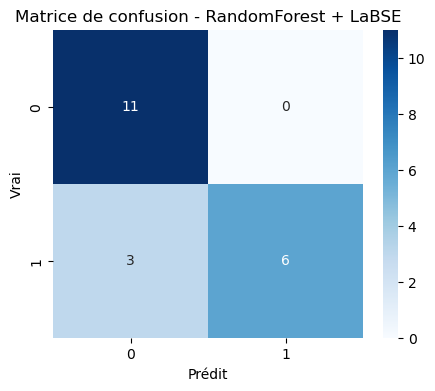


Top 10 dimensions d'embedding les plus importantes:
1. Dimension 78 - importance 0.05798
2. Dimension 560 - importance 0.05480
3. Dimension 273 - importance 0.05145
4. Dimension 690 - importance 0.04924
5. Dimension 709 - importance 0.03767
6. Dimension 567 - importance 0.03370
7. Dimension 530 - importance 0.02309
8. Dimension 416 - importance 0.02306
9. Dimension 175 - importance 0.02205
10. Dimension 496 - importance 0.02012


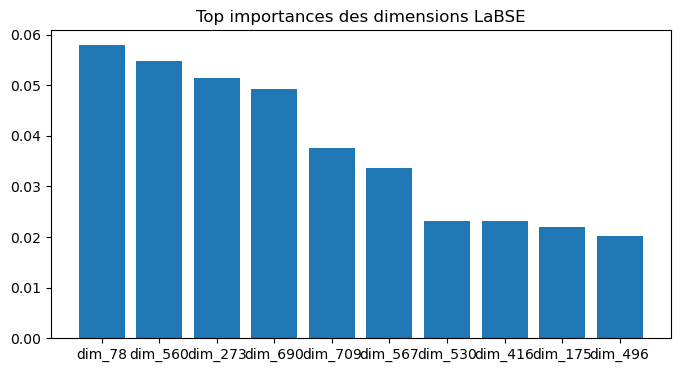


Nombre de textes mal classés dans le test set : 3
Indices globaux mal classés : [45 62 41]

Index global 45 - Eleve_ID: ID_0046
Vrai genre: 1  | Prédiction: 0
Extrait : il être déjà tard alors le deux enfant aller appeler leur parent quand soudain le explorateur voyer leur bateau qui être dans le main un garçon il aller le voir et leur dire rendre nous notre bateau mais le garçon dire ce être pas avoir vous le copain dire au garçon ci on jouer tout ensemble il être ...


Index global 62 - Eleve_ID: ID_0063
Vrai genre: 1  | Prédiction: 0
Extrait : il être déjà trop tard le jumelle être déjà trop loin mais lui arriver sur un tout petit île avec un palmier de coquiage et un dauphin le jumelle se précipiter sur île être voir se dauphin allonger sou le palmier boire dans un noix de coco de sirop le jumelle en croiver pas leur oeil ce étrange anim ...


Index global 41 - Eleve_ID: ID_0042
Vrai genre: 1  | Prédiction: 0
Extrait : il être déjà tard le lendemain le enfant trouver un petit grot

In [37]:
# RandomForest sur LaBSE avec GridSearchCV et matrice de confusion sur texte_lemmatise
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16         # batch pour encodage LaBSE
APPLY_SCALER = False          # RF n'a pas besoin d'être scale par défaut
GRID_N_JOBS = 2               # parallélisme pour GridSearch (mettre -1 si tu veux tous les coeurs)

# -------------------------
# 0. Vérifications / Préconditions
# -------------------------
assert 'texte_lemmatise' in df.columns and 'genre' in df.columns, \
    "Le DataFrame doit contenir 'texte_lemmatise' et 'genre'"

# Texte et labels
X_text_all = df['texte_lemmatise'].astype(str).values
y_all = df['genre'].astype(int).values

# -------------------------
# 1. Split (sur les indices) pour garder trace des indices globaux
# -------------------------
all_idx = np.arange(len(df))
train_idx, test_idx = train_test_split(
    all_idx,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_all
)

X_train_text = X_text_all[train_idx]
X_test_text  = X_text_all[test_idx]
y_train = y_all[train_idx]
y_test  = y_all[test_idx]

print(f"Taille train: {len(X_train_text)} | test: {len(X_test_text)}")

# -------------------------
# 2. Encoder les textes avec LaBSE
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)

labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb = encode_texts(X_test_text, labse)

# -------------------------
# 3. Option : standardisation (utile si tu veux comparer avec MLP etc.)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test  = scaler.transform(X_test_emb)
else:
    scaler = None
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. GridSearchCV pour RandomForest
# -------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5]   # 'sqrt' ou fraction des features
}

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=GRID_N_JOBS
)

print("\nLancement du GridSearchCV (RandomForest)...")
grid_search.fit(X_train, y_train)

# -------------------------
# 5. Résultats du GridSearch
# -------------------------
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print(f"Score CV (moyen) : {grid_search.best_score_:.4f}")

# -------------------------
# 6. Évaluation finale sur le test set
# -------------------------
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Évaluation sur le test set ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_all), yticklabels=np.unique(y_all))
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - RandomForest + LaBSE")
plt.show()

# -------------------------
# 7. Importances de features (dimensions d'embedding)
# -------------------------
# Attention : les "features" ici sont les dimensions de l'embedding LaBSE (0..767)
importances = best_rf.feature_importances_
top_k = 10
top_idx = np.argsort(importances)[::-1][:top_k]
print(f"\nTop {top_k} dimensions d'embedding les plus importantes:")
for rank, i in enumerate(top_idx, 1):
    print(f"{rank}. Dimension {i} - importance {importances[i]:.5f}")

# Optionnel : plot importances
plt.figure(figsize=(8,4))
plt.bar([f"dim_{i}" for i in top_idx], importances[top_idx])
plt.title("Top importances des dimensions LaBSE")
plt.show()

# -------------------------
# 8. Textes mal classés dans le test set (indices globaux)
# -------------------------
misclassified_idx_in_test = np.where(y_pred != y_test)[0]   # indices relatifs au test set
global_misclassified_idx = test_idx[misclassified_idx_in_test]  # indices dans le df original

print(f"\nNombre de textes mal classés dans le test set : {len(global_misclassified_idx)}")
print("Indices globaux mal classés :", global_misclassified_idx)

# Affichage des textes mal classés
for idx_df in global_misclassified_idx:
    # trouver position dans test set pour afficher prédiction correspondante
    pos_in_test = np.where(test_idx == idx_df)[0][0]
    print(f"\nIndex global {idx_df} - Eleve_ID: {df.loc[idx_df,'Eleve_ID'] if 'Eleve_ID' in df.columns else 'NA'}")
    print("Vrai genre:", int(y_all[idx_df]), " | Prédiction:", int(y_pred[pos_in_test]))
    print("Extrait :", df.loc[idx_df, 'texte_lemmatise'][:300], "...\n")


# -------------------------
# 9. Sauvegarde du meilleur modèle et du scaler
# -------------------------
import joblib
joblib.dump(best_rf, "best_rf_model.pkl")
if scaler is not None:
    joblib.dump(scaler, "scaler_rf.pkl")
print("Modèle RandomForest (et scaler éventuel) sauvegardés.")

Taille train: 45 | test: 20
Device pour l'encodage : cpu


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage train...


Batches: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Encodage test...


Batches: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]



Lancement du GridSearchCV (RandomForest)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;

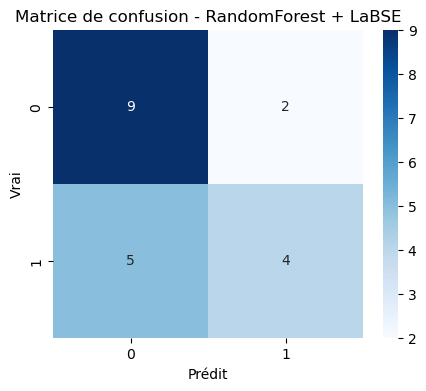


Top 10 dimensions d'embedding les plus importantes:
1. Dimension 338 - importance 0.07348
2. Dimension 560 - importance 0.05770
3. Dimension 422 - importance 0.04579
4. Dimension 496 - importance 0.03420
5. Dimension 273 - importance 0.02294
6. Dimension 297 - importance 0.02191
7. Dimension 416 - importance 0.02022
8. Dimension 530 - importance 0.01793
9. Dimension 36 - importance 0.01740
10. Dimension 185 - importance 0.01599


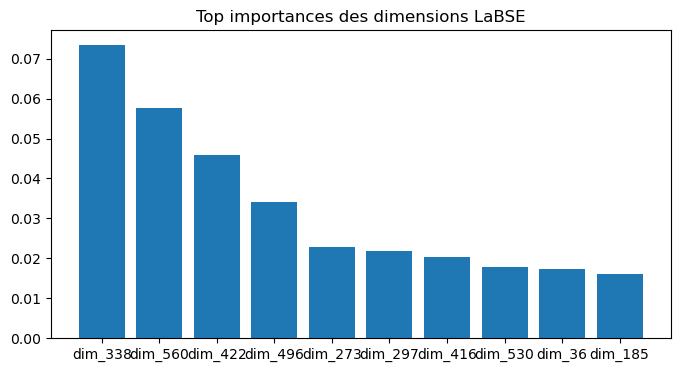


Nombre de textes mal classés dans le test set : 7
Indices globaux mal classés : [45  6 17 62 64 42 41]

Index global 45 - Eleve_ID: ID_0046
Vrai genre: 1  | Prédiction: 0
Extrait : Il est déjà tard…
Alors les deux enfant vont appeler leurs parents quand soudain les explorateurs voyent leurs bateau qui sont dans les mains d’un garçon. Ils vont le voir et leurs dit « rend nous nos bateau » mais le garçon dit « ce n’est pas a vous les copains disent au garçon « ci on jouer tous e ...


Index global 6 - Eleve_ID: ID_0007
Vrai genre: 0  | Prédiction: 1
Extrait : Il est déjà trop tard…
Sarah commençat à paniquer pendant que Paul son frère cherchait des solution. Mais, le vent se mit a souflé de plus en plus fort et les vague était de plus en plus haute. Pandent la nuit, le vent se calma et les deux enfant se mirent à dormir. Un voilier de croisière passé non ...


Index global 17 - Eleve_ID: ID_0018
Vrai genre: 1  | Prédiction: 0
Extrait : Il est déjà trop tard…
C’était deux amis très copin

In [36]:
# RandomForest sur LaBSE avec GridSearchCV et matrice de confusion sur texte_sans_stopwords
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# -------------------------
# Réglages
# -------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.3
BATCH_SIZE_EMBED = 16         # batch pour encodage LaBSE
APPLY_SCALER = False          # RF n'a pas besoin d'être scale par défaut
GRID_N_JOBS = 2               # parallélisme pour GridSearch (mettre -1 si tu veux tous les coeurs)

# -------------------------
# 0. Vérifications / Préconditions
# -------------------------
assert 'texte_sans_stopwords' in df.columns and 'genre' in df.columns, \
    "Le DataFrame doit contenir 'texte_sans_stopwords' et 'genre'"

# Texte et labels
X_text_all = df['texte_sans_stopwords'].astype(str).values
y_all = df['genre'].astype(int).values

# -------------------------
# 1. Split (sur les indices) pour garder trace des indices globaux
# -------------------------
all_idx = np.arange(len(df))
train_idx, test_idx = train_test_split(
    all_idx,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_all
)

X_train_text = X_text_all[train_idx]
X_test_text  = X_text_all[test_idx]
y_train = y_all[train_idx]
y_test  = y_all[test_idx]

print(f"Taille train: {len(X_train_text)} | test: {len(X_test_text)}")

# -------------------------
# 2. Encoder les textes avec LaBSE
# -------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device pour l'encodage :", device)

labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model, batch_size=BATCH_SIZE_EMBED):
    return model.encode(list(texts),
                        batch_size=batch_size,
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Encodage train...")
X_train_emb = encode_texts(X_train_text, labse)
print("Encodage test...")
X_test_emb = encode_texts(X_test_text, labse)

# -------------------------
# 3. Option : standardisation (utile si tu veux comparer avec MLP etc.)
# -------------------------
if APPLY_SCALER:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_emb)
    X_test  = scaler.transform(X_test_emb)
else:
    scaler = None
    X_train, X_test = X_train_emb, X_test_emb

# -------------------------
# 4. GridSearchCV pour RandomForest
# -------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 0.5]   # 'sqrt' ou fraction des features
}

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=GRID_N_JOBS
)

print("\nLancement du GridSearchCV (RandomForest)...")
grid_search.fit(X_train, y_train)

# -------------------------
# 5. Résultats du GridSearch
# -------------------------
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)
print(f"Score CV (moyen) : {grid_search.best_score_:.4f}")

# -------------------------
# 6. Évaluation finale sur le test set
# -------------------------
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Évaluation sur le test set ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_all), yticklabels=np.unique(y_all))
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion - RandomForest + LaBSE")
plt.show()

# -------------------------
# 7. Importances de features (dimensions d'embedding)
# -------------------------
# Attention : les "features" ici sont les dimensions de l'embedding LaBSE (0..767)
importances = best_rf.feature_importances_
top_k = 10
top_idx = np.argsort(importances)[::-1][:top_k]
print(f"\nTop {top_k} dimensions d'embedding les plus importantes:")
for rank, i in enumerate(top_idx, 1):
    print(f"{rank}. Dimension {i} - importance {importances[i]:.5f}")

# Optionnel : plot importances
plt.figure(figsize=(8,4))
plt.bar([f"dim_{i}" for i in top_idx], importances[top_idx])
plt.title("Top importances des dimensions LaBSE")
plt.show()

# -------------------------
# 8. Textes mal classés dans le test set (indices globaux)
# -------------------------
misclassified_idx_in_test = np.where(y_pred != y_test)[0]   # indices relatifs au test set
global_misclassified_idx = test_idx[misclassified_idx_in_test]  # indices dans le df original

print(f"\nNombre de textes mal classés dans le test set : {len(global_misclassified_idx)}")
print("Indices globaux mal classés :", global_misclassified_idx)

# Affichage des textes mal classés
for idx_df in global_misclassified_idx:
    # trouver position dans test set pour afficher prédiction correspondante
    pos_in_test = np.where(test_idx == idx_df)[0][0]
    print(f"\nIndex global {idx_df} - Eleve_ID: {df.loc[idx_df,'Eleve_ID'] if 'Eleve_ID' in df.columns else 'NA'}")
    print("Vrai genre:", int(y_all[idx_df]), " | Prédiction:", int(y_pred[pos_in_test]))
    print("Extrait :", df.loc[idx_df, 'texte_nettoye'][:300], "...\n")

In [81]:
# LOO optimisé (batch encoding) pour MLP Classifier — n'affiche que les tokens principaux favorisant la classe prédite (rouge)
import numpy as np
import joblib
from sentence_transformers import SentenceTransformer
from IPython.display import display, HTML
import math
import textwrap

# -------- CONFIG --------
LA_BSE_MODEL = "sentence-transformers/LaBSE"
USE_COLUMN = "texte_lemmatise"       # Texte correspondant au modèle entraîné
TARGET_CLASS_LABELS = {0: "Garçon", 1: "Fille"}
BATCH_ENCODE_SIZE = 32             # taille batch pour labse.encode (ajuste si mémoire)
TOP_K = 20                         # nombre de tokens principaux à afficher (None pour désactiver)
THRESHOLD = None                   # delta minimal (p_orig - p_removed) pour garder un token (None pour désactiver)
CONTEXT_WINDOW = 3                 # tokens de contexte à afficher autour du token principal (0 = aucun)
MAX_TOKENS_TO_PROCESS = 400        # pour protéger contre textes immenses
# ------------------------

# Charger modèle + labse + scaler si présent
device = "cuda" if __import__("torch").cuda.is_available() else "cpu"
best_mlp = joblib.load("best_mlp_model.pkl")
scaler = joblib.load("scaler.pkl")
labse = SentenceTransformer(LA_BSE_MODEL, device=device)

def predict_proba_batch_from_embeddings(embs_np):
    if scaler is not None:
        embs_for = scaler.transform(embs_np)
    else:
        embs_for = embs_np
    return best_mlp.predict_proba(embs_for)

def batch_encode_texts(texts, batch_size=BATCH_ENCODE_SIZE):
    """Encode une liste de textes en batches et retourne un numpy array (n_texts, dim)."""
    all_emb = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        emb = labse.encode(batch, convert_to_numpy=True, normalize_embeddings=False)
        all_emb.append(emb)
    return np.vstack(all_emb) if len(all_emb)>0 else np.zeros((0,768))

def tokenized(text):
    """Tokenisation simple par espaces (ajuste si tu veux une tokenisation plus fine)."""
    toks = text.split()
    # limiter pour éviter explosion
    if len(toks) > MAX_TOKENS_TO_PROCESS:
        toks = toks[:MAX_TOKENS_TO_PROCESS]
    return toks

def compute_loo_deltas_vectorized(text, target_class=None):
    """
    Retourne:
      - tokens (list)
      - deltas (np.array) shape (n_tokens,) where delta = p_orig(target) - p_removed(target)
      - p_orig (float)
      - pred_class (int)
    Cette version construit toutes les versions perturbées et encode en batch.
    """
    tokens = tokenized(text)
    n = len(tokens)
    if n == 0:
        return [], np.array([]), 0.0, None

    # textes perturbés : pour chaque position i, texte sans token i
    pert_texts = []
    for i in range(n):
        pert = tokens[:i] + tokens[i+1:]
        pert_texts.append(" ".join(pert).strip() or "")  # si vide, envoyer "" (labse accepte)
    # original
    all_texts = [text] + pert_texts  # index 0 = original, rest = perturbed

    # encodage batch (optimisé)
    embs = batch_encode_texts(all_texts)
    probs = predict_proba_batch_from_embeddings(embs)  # shape (n+1, n_classes)
    # déterminer la classe si target_class None
    if target_class is None:
        pred_class = int(np.argmax(probs[0]))
    else:
        pred_class = int(target_class)
    p_orig = float(probs[0, pred_class])
    p_pert = probs[1:, pred_class]  # shape (n,)
    deltas = p_orig - p_pert
    return tokens, deltas, p_orig, pred_class

def select_top_tokens(tokens, deltas, top_k=TOP_K, threshold=THRESHOLD):
    """
    Sélectionne les tokens à afficher selon top_k et/ou threshold.
    Retourne la liste d'indices sélectionnés triés par ordre d'apparition dans le texte.
    """
    n = len(tokens)
    if n == 0:
        return []
    idxs = np.arange(n)
    mask = np.ones(n, dtype=bool)
    if threshold is not None:
        mask = mask & (np.abs(deltas) >= threshold)
    idxs_masked = idxs[mask]
    if top_k is not None and len(idxs_masked) > top_k:
        # prendre les top_k selon valeur absolue de delta
        top_order = np.argsort(np.abs(deltas[idxs_masked]))[::-1][:top_k]
        chosen = idxs_masked[top_order]
        chosen = np.sort(chosen)  # remettre dans l'ordre d'apparition
    else:
        chosen = idxs_masked
    return list(chosen)

def build_highlighted_html(tokens, selected_indices, predicted_class_label, context_window=CONTEXT_WINDOW):
    """
    Construit un HTML qui affiche uniquement les morceaux autour des tokens sélectionnés,
    chaque token sélectionné mis en évidence en rouge (fond rouge), et le reste caché.
    On regroupe les contexts proches pour éviter répétitions.
    """
    if len(selected_indices) == 0:
        return "<div>Aucun token principal retenu (seuil/top_k trop stricts).</div>"

    # construire intervalles de contexte pour chaque index
    intervals = []
    for idx in selected_indices:
        start = max(0, idx - context_window)
        end = min(len(tokens)-1, idx + context_window)
        intervals.append((start, end))
    # fusionner intervals chevauchants
    intervals_sorted = sorted(intervals, key=lambda x: x[0])
    merged = []
    cur_s, cur_e = intervals_sorted[0]
    for s,e in intervals_sorted[1:]:
        if s <= cur_e + 1:
            cur_e = max(cur_e, e)
        else:
            merged.append((cur_s, cur_e))
            cur_s, cur_e = s, e
    merged.append((cur_s, cur_e))

    # construire HTML en affichant seulement les segments fusionnés, avec tokens sélectionnés en rouge
    parts = []
    for (s,e) in merged:
        seg_tokens = tokens[s:e+1]
        seg_html_tokens = []
        for rel_idx, tok in enumerate(seg_tokens):
            abs_idx = s + rel_idx
            if abs_idx in selected_indices:
                # fond rouge vif, texte blanc
                span = f"<span style='background:#ff4d4d; color:#fff; padding:3px 6px; border-radius:4px; margin:2px; display:inline-block'>{tok}</span>"
            else:
                # texte gris (ou invisible) — ici gris léger pour context
                span = f"<span style='color:#666; padding:1px 3px; margin:1px; display:inline-block'>{tok}</span>"
            seg_html_tokens.append(span)
        parts.append(" ".join(seg_html_tokens))
    # séparer segments par ellipse
    html = " <span style='color:#000;'> ... </span> ".join(parts)
    return html

# -------- Exemple d'utilisation --------
index = 47  # Index du df
text = df.iloc[index][USE_COLUMN]
print("Extrait du texte:", text[:250], "...\n")

tokens, deltas, p_orig, pred_class = compute_loo_deltas_vectorized(text, target_class=None)
print(f"Classe prédite: {pred_class} ({TARGET_CLASS_LABELS.get(pred_class, pred_class)}), prob={p_orig:.4f}")
print(f"Nombre de tokens considérés: {len(tokens)}")

# sélection
selected_idxs = select_top_tokens(tokens, deltas, top_k=TOP_K, threshold=THRESHOLD)
print(f"Nombre de tokens sélectionnés: {len(selected_idxs)} (TOP_K={TOP_K}, THRESHOLD={THRESHOLD})")

# construire HTML et afficher
html = build_highlighted_html(tokens, selected_idxs, predicted_class_label=pred_class, context_window=CONTEXT_WINDOW)
legend = f"""
<div style="font-family:Arial; font-size:14px; margin-bottom:8px;">
  <strong>Classe prédite :</strong> {TARGET_CLASS_LABELS.get(pred_class,pred_class)} &nbsp;&nbsp;
  <strong>Probabilité :</strong> {p_orig:.3f}
  <div style="margin-top:6px;">
    <span style="display:inline-block; padding:6px; background:#ff4d4d; color:white; border-radius:3px; margin-right:8px;">Rouge = favorise la classe prédite</span>
  </div>
</div>
<hr style="margin-top:6px; margin-bottom:8px;">
"""
display(HTML(legend + html))

# tableau des tokens sélectionnés (avec index et delta)
import pandas as pd
rows = []
for i in selected_idxs:
    rows.append({"index": i, "token": tokens[i], "delta": float(deltas[i])})
df_sel = pd.DataFrame(rows).sort_values(by="delta", ascending=False)
print("\nTokens sélectionnés (triés par delta décroissant):")
display(df_sel)

# optionnel : afficher top_k global (même si pas sélectionnés par threshold)
top_global_idx = np.argsort(np.abs(deltas))[::-1][:TOP_K]
print("\nTop global (par abs(delta)) :")
display(pd.DataFrame([{"index":int(i),"token":tokens[i],"delta":float(deltas[i])} for i in top_global_idx]))


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Extrait du texte: il être déjà tard et par chance il être trouver un petit moteur à essence mais le problème être avoir avoir pas essence et soudain il voyer un rabo remplie de bidon essence dans eau dans un sau il y avoir de essence dans le moteur Melvin dire vien av ...

Classe prédite: 0 (Garçon), prob=1.0000
Nombre de tokens considérés: 59
Nombre de tokens sélectionnés: 20 (TOP_K=20, THRESHOLD=None)



Tokens sélectionnés (triés par delta décroissant):


,index,token,delta
15,46,Melvin,1.013279e-05
4,9,trouver,6.437302e-06
19,58,plage,5.841255e-06
18,53,regarder,2.443790e-06
1,3,tard,1.668930e-06
9,21,pas,1.609325e-06
12,27,un,1.549721e-06
10,24,soudain,1.490116e-06
17,52,Lucas,1.311302e-06
11,26,voyer,1.251698e-06



Top global (par abs(delta)) :


,index,token,delta
0,46,Melvin,1.013279e-05
1,9,trouver,6.437302e-06
2,58,plage,5.841255e-06
3,15,mais,-3.695488e-06
4,53,regarder,2.443790e-06
5,14,essence,-2.145767e-06
6,3,tard,1.668930e-06
7,21,pas,1.609325e-06
8,27,un,1.549721e-06
9,12,moteur,-1.490116e-06


In [26]:
# =========================
# Visulalisation des erreurs de classification 
# =========================
import joblib 

best_mlp = joblib.load("best_mlp_model.pkl")
SentenceTransformer("sentence-transformers/LaBSE", device=device)
scaler = joblib.load("scaler.pkl")

# ===============================
# 1. Encodage de tous les textes
# ===============================
X_all_text = df['texte_lemmatise'].astype(str).values
X_all_emb = labse.encode(list(X_all_text),
                         batch_size=BATCH_SIZE_EMBED,
                         show_progress_bar=True,
                         convert_to_numpy=True,
                         normalize_embeddings=False)

# ===============================
# 2. Standardisation avec le scaler du train
# ===============================
X_all_scaled = scaler.transform(X_all_emb)

# ===============================
# 3. Prédiction avec le MLP entraîné
# ===============================
y_all_pred = best_mlp.predict(X_all_scaled)

# ===============================
# 4. Comparaison avec les labels réels
# ===============================
y_all_true = df['genre'].astype(int).values

# Indices des textes mal classés
misclassified_idx = np.where(y_all_pred != y_all_true)[0]

print(f"Nombre de textes mal classés : {len(misclassified_idx)}")
print("Indices des textes mal classés :", misclassified_idx)

# Affichage des textes mal classés et de leur prédiction
for idx in misclassified_idx:
    print(f"\nIndex {idx} - Genre réel : {y_all_true[idx]}, Prédiction : {y_all_pred[idx]}")
    print(df.iloc[idx]['texte_lemmatise'][:200], "...")  # affiche un extrait

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Nombre de textes mal classés : 3
Indices des textes mal classés : [ 6 45 64]

Index 6 - Genre réel : 0, Prédiction : 1
il être déjà trop tard Sarah commençat à paniquer pendant que Paul son frère chercher un solution mais le vent se mettre avoir soufler de plus en plus fort et le vague être de plus en plus haute pande ...

Index 45 - Genre réel : 1, Prédiction : 0
il être déjà tard alors le deux enfant aller appeler leur parent quand soudain le explorateur voyer leur bateau qui être dans le main un garçon il aller le voir et leur dire rendre nous notre bateau m ...

Index 64 - Genre réel : 0, Prédiction : 1
il être déjà tard un famille aller à le plage le enfant mettre un banque à eau il jouer au explorateur il secarte de le plage sans le savoir le vent souffler très fort il venir de le terre à un moment ...


In [28]:
# Nombre de mots pour un texte spécifique

index = 45
print("Nombre de mot dans le texte", index, ":", df.iloc[index]['nb_mots'])


Nombre de mot dans le texte 45 : 94


In [80]:
# LOO optimisé (batch encoding) — pour RandomForest, n'affiche que les tokens principaux favorisant la classe prédite (rouge)
import numpy as np
import joblib
from sentence_transformers import SentenceTransformer
from IPython.display import display, HTML
import pandas as pd

# -------- CONFIG --------
SCALER_PATH = None                 # "scaler_rf.pkl" si tu as un scaler, sinon None
LA_BSE_MODEL = "sentence-transformers/LaBSE"
USE_COLUMN = "texte_lemmatise"       # Texte correspondant au modèle
TARGET_CLASS_LABELS = {0: "Garçon", 1: "Fille"}
BATCH_ENCODE_SIZE = 32             # taille batch pour labse.encode (ajuste si mémoire)
TOP_K = 20                         # nombre de tokens principaux à afficher (None pour désactiver)
THRESHOLD = 0.001                  # delta minimal (p_orig - p_removed) pour garder un token (None pour désactiver)
CONTEXT_WINDOW = 3                 # tokens de contexte à afficher autour du token principal (0 = aucun)
MAX_TOKENS_TO_PROCESS = 400        # pour protéger contre textes immenses
# ------------------------

# Charger modèle + labse + scaler si présent
device = "cuda" if __import__("torch").cuda.is_available() else "cpu"
best_rf = joblib.load("best_rf_model.pkl")
scaler = joblib.load(SCALER_PATH) if SCALER_PATH is not None else None
labse = SentenceTransformer(LA_BSE_MODEL, device=device)

def predict_proba_batch_from_embeddings(embs_np):
    """Prédictions proba pour un batch d'embeddings via Random Forest"""
    embs_for = scaler.transform(embs_np) if scaler is not None else embs_np
    return best_rf.predict_proba(embs_for)

def batch_encode_texts(texts, batch_size=BATCH_ENCODE_SIZE):
    """Encode une liste de textes en batches et retourne un numpy array (n_texts, dim)."""
    all_emb = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        emb = labse.encode(batch, convert_to_numpy=True, normalize_embeddings=False)
        all_emb.append(emb)
    return np.vstack(all_emb) if len(all_emb)>0 else np.zeros((0,768))

def tokenized(text):
    """Tokenisation simple par espaces"""
    toks = text.split()
    return toks[:MAX_TOKENS_TO_PROCESS] if len(toks) > MAX_TOKENS_TO_PROCESS else toks

def compute_loo_deltas_vectorized(text, target_class=None):
    """Compute leave-one-out deltas pour chaque token"""
    tokens = tokenized(text)
    n = len(tokens)
    if n == 0:
        return [], np.array([]), 0.0, None

    pert_texts = [" ".join(tokens[:i] + tokens[i+1:]).strip() or "" for i in range(n)]
    all_texts = [text] + pert_texts

    embs = batch_encode_texts(all_texts)
    probs = predict_proba_batch_from_embeddings(embs)  # shape (n+1, n_classes)

    pred_class = int(np.argmax(probs[0])) if target_class is None else int(target_class)
    p_orig = float(probs[0, pred_class])
    deltas = p_orig - probs[1:, pred_class]
    return tokens, deltas, p_orig, pred_class

def select_top_tokens(tokens, deltas, top_k=TOP_K, threshold=THRESHOLD):
    n = len(tokens)
    if n == 0:
        return []
    idxs = np.arange(n)
    mask = np.ones(n, dtype=bool)
    if threshold is not None:
        mask &= (np.abs(deltas) >= threshold)
    idxs_masked = idxs[mask]
    if top_k is not None and len(idxs_masked) > top_k:
        top_order = np.argsort(np.abs(deltas[idxs_masked]))[::-1][:top_k]
        chosen = np.sort(idxs_masked[top_order])
    else:
        chosen = idxs_masked
    return list(chosen)

def build_highlighted_html(tokens, selected_indices, predicted_class_label, context_window=CONTEXT_WINDOW):
    if len(selected_indices) == 0:
        return "<div>Aucun token principal retenu (seuil/top_k trop stricts).</div>"

    # construire intervalles de contexte
    intervals = []
    for idx in selected_indices:
        start = max(0, idx - context_window)
        end = min(len(tokens)-1, idx + context_window)
        intervals.append((start, end))
    # fusionner intervalles chevauchants
    intervals_sorted = sorted(intervals, key=lambda x: x[0])
    merged = []
    cur_s, cur_e = intervals_sorted[0]
    for s,e in intervals_sorted[1:]:
        if s <= cur_e + 1:
            cur_e = max(cur_e, e)
        else:
            merged.append((cur_s, cur_e))
            cur_s, cur_e = s, e
    merged.append((cur_s, cur_e))

    parts = []
    for (s,e) in merged:
        seg_tokens = tokens[s:e+1]
        seg_html_tokens = []
        for rel_idx, tok in enumerate(seg_tokens):
            abs_idx = s + rel_idx
            if abs_idx in selected_indices:
                span = f"<span style='background:#ff4d4d; color:#fff; padding:3px 6px; border-radius:4px; margin:2px; display:inline-block'>{tok}</span>"
            else:
                span = f"<span style='color:#666; padding:1px 3px; margin:1px; display:inline-block'>{tok}</span>"
            seg_html_tokens.append(span)
        parts.append(" ".join(seg_html_tokens))
    html = " <span style='color:#000;'> ... </span> ".join(parts)
    return html

# -------- Exemple d'utilisation --------
index = 47  # choisis index du df
text = df.iloc[index][USE_COLUMN]
print("Extrait du texte:", text[:250], "...\n")

tokens, deltas, p_orig, pred_class = compute_loo_deltas_vectorized(text)
print(f"Classe prédite: {pred_class} ({TARGET_CLASS_LABELS.get(pred_class, pred_class)}), prob={p_orig:.4f}")
print(f"Nombre de tokens considérés: {len(tokens)}")

# sélection
selected_idxs = select_top_tokens(tokens, deltas, top_k=TOP_K, threshold=THRESHOLD)
print(f"Nombre de tokens sélectionnés: {len(selected_idxs)} (TOP_K={TOP_K}, THRESHOLD={THRESHOLD})")

# construire HTML et afficher
html = build_highlighted_html(tokens, selected_idxs, predicted_class_label=pred_class, context_window=CONTEXT_WINDOW)
legend = f"""
<div style="font-family:Arial; font-size:14px; margin-bottom:8px;">
  <strong>Classe prédite :</strong> {TARGET_CLASS_LABELS.get(pred_class,pred_class)} &nbsp;&nbsp;
  <strong>Probabilité :</strong> {p_orig:.3f}
  <div style="margin-top:6px;">
    <span style="display:inline-block; padding:6px; background:#ff4d4d; color:white; border-radius:3px; margin-right:8px;">Rouge = favorise la classe prédite</span>
  </div>
</div>
<hr style="margin-top:6px; margin-bottom:8px;">
"""
display(HTML(legend + html))

# tableau des tokens sélectionnés
rows = [{"index": i, "token": tokens[i], "delta": float(deltas[i])} for i in selected_idxs]
if rows:
    df_sel = pd.DataFrame(rows).sort_values(by="delta", ascending=False)
    print("\nTokens sélectionnés (triés par delta décroissant):")
    display(df_sel)
else:
    print("\nAucun token sélectionné avec le seuil/top_k actuel.")

# top global
if len(deltas) > 0:
    top_global_idx = np.argsort(np.abs(deltas))[::-1][:TOP_K]
    display(pd.DataFrame([{"index":int(i),"token":tokens[i],"delta":float(deltas[i])} for i in top_global_idx]))

/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Extrait du texte: il être déjà tard et par chance il être trouver un petit moteur à essence mais le problème être avoir avoir pas essence et soudain il voyer un rabo remplie de bidon essence dans eau dans un sau il y avoir de essence dans le moteur Melvin dire vien av ...

Classe prédite: 0 (Garçon), prob=0.9400
Nombre de tokens considérés: 59
Nombre de tokens sélectionnés: 20 (TOP_K=20, THRESHOLD=0.001)



Tokens sélectionnés (triés par delta décroissant):


,index,token,delta
4,7,il,0.06
12,25,il,0.06
11,24,soudain,0.04
2,5,par,0.04
3,6,chance,0.04
16,34,eau,0.04
6,11,petit,0.04
14,31,bidon,0.04
9,17,problème,0.04
0,3,tard,0.02


,index,token,delta
0,25,il,0.06
1,7,il,0.06
2,34,eau,0.04
3,17,problème,0.04
4,31,bidon,0.04
5,5,par,0.04
6,6,chance,0.04
7,24,soudain,0.04
8,11,petit,0.04
9,32,essence,-0.02


In [ ]:
# Résumé des prédictions RF et MLP sur tout le DataFrame avec probabilités

import numpy as np
import pandas as pd
import joblib
from sentence_transformers import SentenceTransformer
from IPython.display import display

# -------- CONFIG  --------
USE_COLUMN = "texte_lemmatise"         
ELEVE_ID_COL = "Eleve_ID"            
LA_BSE_MODEL = "sentence-transformers/LaBSE"
BATCH_ENCODE_SIZE = 32
RF_MODEL_PATH = "best_rf_model.pkl"
MLP_MODEL_PATH = "best_mlp_model.pkl"
SCALER_RF_PATH = None   # ex: "scaler_rf.pkl" ou None
SCALER_MLP_PATH = "scaler.pkl"  # si scaler MLP sauvegardé (ou None)
CLASS_LABELS = {0: "Garçon", 1: "Fille"}

# -------- Charger modèles + labse + scalers --------
device = "cuda" if __import__("torch").cuda.is_available() else "cpu"
print("Chargement modèles et LaBSE...")
best_rf = joblib.load(RF_MODEL_PATH)
best_mlp = joblib.load(MLP_MODEL_PATH)
labse = SentenceTransformer(LA_BSE_MODEL, device=device)

scaler_rf = joblib.load(SCALER_RF_PATH) if SCALER_RF_PATH is not None else None
scaler_mlp = joblib.load(SCALER_MLP_PATH) if SCALER_MLP_PATH is not None else None

# -------- Préparer les textes à encoder --------
assert USE_COLUMN in df.columns and "genre" in df.columns, "df doit contenir la colonne texte et 'genre'"

texts = df[USE_COLUMN].astype(str).tolist()

# batch encode function
def batch_encode_texts(texts, batch_size=BATCH_ENCODE_SIZE):
    all_emb = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        emb = labse.encode(batch, convert_to_numpy=True, normalize_embeddings=False)
        all_emb.append(emb)
    return np.vstack(all_emb) if len(all_emb) > 0 else np.zeros((0,768))

# -------- Encodage (peut prendre un peu de temps) --------
print("Encodage des textes...")
embs = batch_encode_texts(texts, batch_size=BATCH_ENCODE_SIZE)
print("Shape embeddings :", embs.shape)

# -------- Préparer embeddings pour chaque modèle (appliquer scaler si nécessaire) --------
embs_for_rf = scaler_rf.transform(embs) if scaler_rf is not None else embs
embs_for_mlp = scaler_mlp.transform(embs) if scaler_mlp is not None else embs

# -------- Prédictions & probabilités --------
print("Calcul prédictions RF...")
rf_probs = best_rf.predict_proba(embs_for_rf)    # shape (n, n_classes)
rf_preds = np.argmax(rf_probs, axis=1)
# probabilité associée à la classe prédite (pour info)
rf_prob_pred = rf_probs[np.arange(len(rf_preds)), rf_preds]

print("Calcul prédictions MLP...")
mlp_probs = best_mlp.predict_proba(embs_for_mlp)  # shape (n, n_classes)
mlp_preds = np.argmax(mlp_probs, axis=1)
mlp_prob_pred = mlp_probs[np.arange(len(mlp_preds)), mlp_preds]

# -------- Construire DataFrame récapitulatif --------
rows = []
for i in range(len(df)):
    eleve = df.iloc[i][ELEVE_ID_COL] if ELEVE_ID_COL in df.columns else i
    true_gen = int(df.iloc[i]["genre"])
    rows.append({
        "Eleve_ID": eleve,
        "genre_reel": CLASS_LABELS.get(true_gen, true_gen),
        "rf_pred_label": CLASS_LABELS.get(int(rf_preds[i]), int(rf_preds[i])),
        "rf_pred": int(rf_preds[i]),
        "rf_prob_pred": float(rf_prob_pred[i]),
        "mlp_pred_label": CLASS_LABELS.get(int(mlp_preds[i]), int(mlp_preds[i])),
        "mlp_pred": int(mlp_preds[i]),
        "mlp_prob_pred": float(mlp_prob_pred[i])
    })

results_df = pd.DataFrame(rows)

# trier par probabilité MLP décroissante
results_df = results_df.sort_values(by="mlp_prob_pred", ascending=False).reset_index(drop=True)

# affichage
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_rows', None) 
print("Résultats triés par probabilité (MLP) décroissante :")
display(results_df)

Chargement modèles et LaBSE...


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Encodage des textes...
Shape embeddings : (65, 768)
Calcul prédictions RF...
Calcul prédictions MLP...
Résultats triés par probabilité (MLP) décroissante :


,Eleve_ID,genre_reel,rf_pred_label,rf_pred,rf_prob_pred,mlp_pred_label,mlp_pred,mlp_prob_pred
0,ID_0048,Garçon,Garçon,0,0.940000,Garçon,0,0.999992
1,ID_0027,Fille,Fille,1,0.920000,Fille,1,0.999979
2,ID_0064,Garçon,Garçon,0,0.860000,Garçon,0,0.999970
3,ID_0051,Garçon,Garçon,0,0.904000,Garçon,0,0.999959
4,ID_0006,Garçon,Garçon,0,0.900000,Garçon,0,0.999952
5,ID_0004,Garçon,Garçon,0,0.920000,Garçon,0,0.999933
6,ID_0032,Garçon,Garçon,0,0.920000,Garçon,0,0.999930
7,ID_0024,Garçon,Garçon,0,0.804000,Garçon,0,0.999929
8,ID_0056,Fille,Fille,1,0.920000,Fille,1,0.999929
9,ID_0003,Garçon,Garçon,0,0.804000,Garçon,0,0.999896


/opt/anaconda3/envs/linguistique/lib/python3.9/site-packages/sentence_transformers/models/Dense.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(to

Calcul des embeddings LaBSE...


Batches: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]


Shape embeddings : (65, 768)
Shape labels : (65,)
Adjusted Rand Index (ARI) : 0.0399
Silhouette Score : 0.0465
Variance expliquée par les 2 composantes PCA : 13.03%


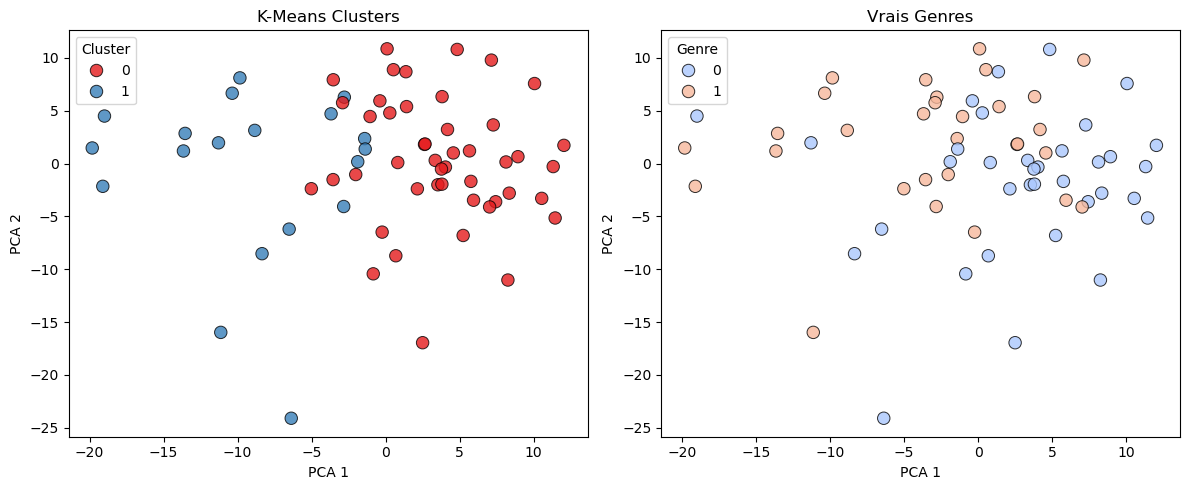


Tableau de contingence :
cluster   0   1
genre          
0        28   7
1        18  12


In [31]:
# predictions finales avec clustering non supervisé (K-Means) sur les embeddings LaBSE

# Imports
import numpy as np
import pandas as pd
import torch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

# ======================
# 1. Préparer les données
# ======================
device = "cuda" if torch.cuda.is_available() else "cpu"

# Texte et labels
X_text = df['texte_lemmatise'].values

# Encoder les labels si nécessaire
le = LabelEncoder()
y_true = le.fit_transform(df['genre'])

# LaBSE
labse = SentenceTransformer("sentence-transformers/LaBSE", device=device)

def encode_texts(texts, model):
    return model.encode(list(texts),
                        show_progress_bar=True,
                        convert_to_numpy=True,
                        normalize_embeddings=False)

print("Calcul des embeddings LaBSE...")
X_LaBSE = encode_texts(X_text, labse)

assert len(X_LaBSE) == len(y_true), "Mismatch entre embeddings et labels"
print("Shape embeddings :", X_LaBSE.shape)
print("Shape labels :", y_true.shape)

# ======================
# 2. Clustering K-Means
# ======================
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_LaBSE)

# Évaluer le clustering
ari = adjusted_rand_score(y_true, clusters)
sil_score = silhouette_score(X_LaBSE, clusters)
print(f"Adjusted Rand Index (ARI) : {ari:.4f}")
print(f"Silhouette Score : {sil_score:.4f}")

# ======================
# 3. Réduction à 2 dimensions pour visualisation
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_LaBSE)

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)
print(f"Variance expliquée par les 2 composantes PCA : {pca.explained_variance_ratio_.sum():.2%}")

# ======================
# 4. Visualisation
# ======================
plt.figure(figsize=(12,5))

# ---- Vue selon les clusters trouvés par KMeans
plt.subplot(1,2,1)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=clusters, palette="Set1", s=80, alpha=0.8, edgecolor="k")
plt.title("K-Means Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")

# ---- Vue selon les vrais genres
plt.subplot(1,2,2)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y_true, palette="coolwarm", s=80, alpha=0.8, edgecolor="k")
plt.title("Vrais Genres")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Genre")

plt.tight_layout()
plt.show()

# ======================
# 5. Comparaison clusters vs labels
# ======================
df_clusters = df.copy()
df_clusters["cluster"] = clusters

print("\nTableau de contingence :")
print(pd.crosstab(df_clusters["genre"], df_clusters["cluster"]))